In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns

/Users/dhanushlalitha/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Load the data
df = pd.read_csv("../data/cleaned_data.csv", encoding = "ISO-8859-1")

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,loan_amnt,term (months),int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36,13.99,123.03,C4,10.0,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,2003,675,679,7,0,2765.0,29.7,13,Whole Funded,Individual,1.0,0.0
1,24700.0,36,11.99,820.28,C1,10.0,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,1999,715,719,22,0,21470.0,19.2,38,Whole Funded,Individual,4.0,0.0
2,20000.0,60,10.78,432.66,B4,10.0,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,2000,695,699,6,0,7869.0,56.2,18,Whole Funded,Joint App,5.0,0.0
3,10400.0,60,22.45,289.91,F1,3.0,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,25.37,1998,695,699,12,0,21929.0,64.5,35,Whole Funded,Individual,6.0,0.0
4,11950.0,36,13.44,405.18,C3,4.0,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,10.20,1987,690,694,5,0,8822.0,68.4,6,Whole Funded,Individual,0.0,0.0


## Exploratory Data Analysis

We begin by exploring each varibale, plot it and compare it with loan status

In [8]:
df1 = df.copy()
df1['loan_status'] = pd.get_dummies(df1['loan_status'], drop_first=True)

In [9]:
df1.head()

,loan_amnt,term (months),int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36,13.99,123.03,C4,10.0,MORTGAGE,55000.0,Not Verified,Dec-2015,True,debt_consolidation,PA,5.91,2003,675,679,7,0,2765.0,29.7,13,Whole Funded,Individual,1.0,0.0
1,24700.0,36,11.99,820.28,C1,10.0,MORTGAGE,65000.0,Not Verified,Dec-2015,True,small_business,SD,16.06,1999,715,719,22,0,21470.0,19.2,38,Whole Funded,Individual,4.0,0.0
2,20000.0,60,10.78,432.66,B4,10.0,MORTGAGE,63000.0,Not Verified,Dec-2015,True,home_improvement,IL,10.78,2000,695,699,6,0,7869.0,56.2,18,Whole Funded,Joint App,5.0,0.0
3,10400.0,60,22.45,289.91,F1,3.0,MORTGAGE,104433.0,Source Verified,Dec-2015,True,major_purchase,PA,25.37,1998,695,699,12,0,21929.0,64.5,35,Whole Funded,Individual,6.0,0.0
4,11950.0,36,13.44,405.18,C3,4.0,RENT,34000.0,Source Verified,Dec-2015,True,debt_consolidation,GA,10.20,1987,690,694,5,0,8822.0,68.4,6,Whole Funded,Individual,0.0,0.0


In [10]:
non_numeric_columns = df1.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
['sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']


In [11]:
numeric_columns = df1.drop(columns=non_numeric_columns)

In [12]:
numeric_columns.head()

,loan_amnt,term (months),int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,3600.0,36,13.99,123.03,10.0,55000.0,5.91,2003,675,679,7,0,2765.0,29.7,13,1.0,0.0
1,24700.0,36,11.99,820.28,10.0,65000.0,16.06,1999,715,719,22,0,21470.0,19.2,38,4.0,0.0
2,20000.0,60,10.78,432.66,10.0,63000.0,10.78,2000,695,699,6,0,7869.0,56.2,18,5.0,0.0
3,10400.0,60,22.45,289.91,3.0,104433.0,25.37,1998,695,699,12,0,21929.0,64.5,35,6.0,0.0
4,11950.0,36,13.44,405.18,4.0,34000.0,10.20,1987,690,694,5,0,8822.0,68.4,6,0.0,0.0


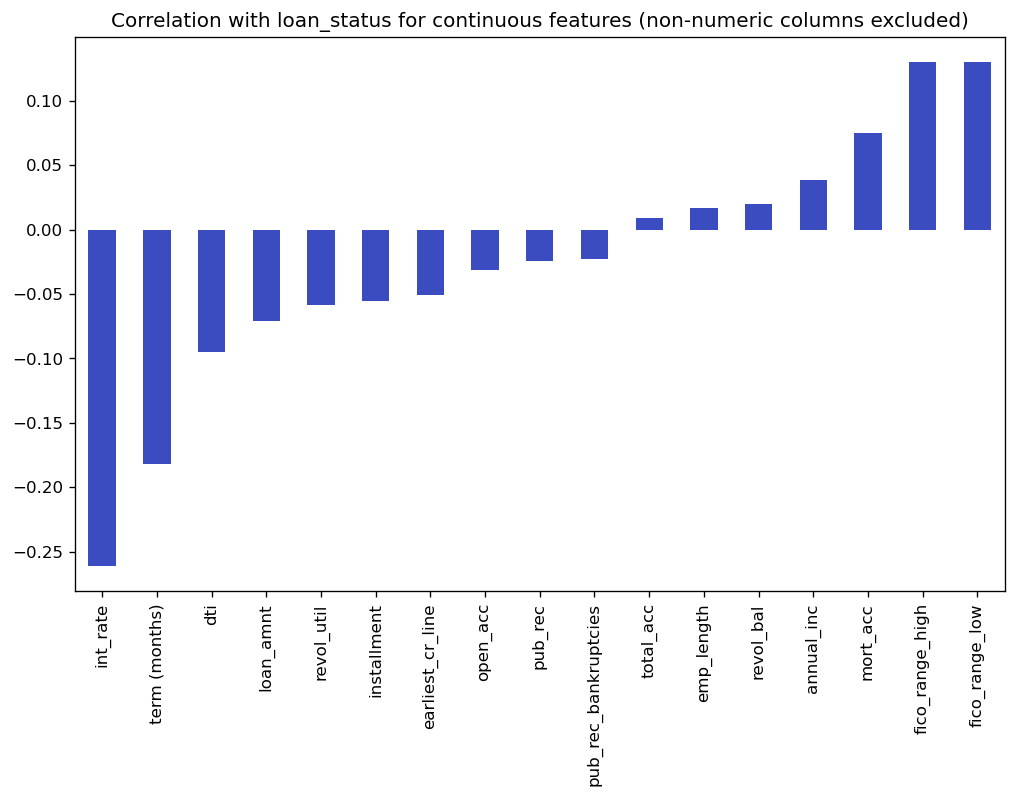

In [13]:
non_numeric_columns = ['sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

# Filter out non-numeric columns
numeric_columns = df1.drop(columns=non_numeric_columns)

# Calculate the correlation
correlation = numeric_columns.corr()['loan_status']

# Plot the correlations
plt.figure(figsize=(10, 6), dpi=120)
correlation.sort_values().drop('loan_status').plot(kind='bar', cmap='coolwarm')
plt.title('Correlation with loan_status for continuous features (non-numeric columns excluded)')
plt.xticks(rotation=90)
plt.show()


#int_rate, fico_range_high and fico_range_low are highly correlated with loan_status compared to other features.

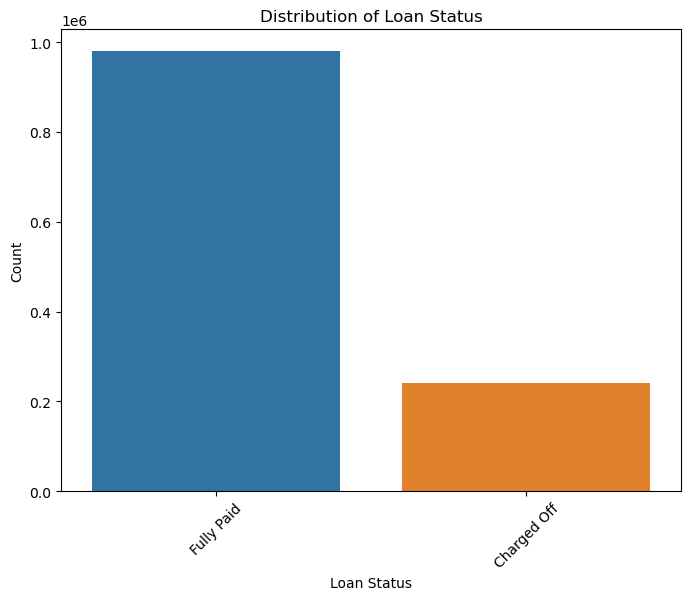

In [14]:
# Plot the distribution of loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Univariate Analyis

Continuous Variables:
1. loan_amnt
2. int_rate
3. installment
4. annual_inc
5. dti
6. fico_range_low
7. fico_range_high
8. open_acc
9. pub_rec
10. revol_bal
11. revol_util
12. total_acc
13. mort_acc
14. pub_rec_bankruptcies

Categorical VAriables:
1. term (months)  
2. earliest_cr_line
3. sub_grade
4. home_ownership
5. verification_status
6. issue_d
7. loan_status
8. purpose
9. addr_state
10. initial_list_status
11. application_type


Not worked on: 
1. earliest_cr_line
2. addr_state
3. issue_d

### 1. loan_amnt

In [15]:
df['loan_amnt'].describe()

count    1.220092e+06
mean     1.471203e+04
std      8.764865e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.250000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

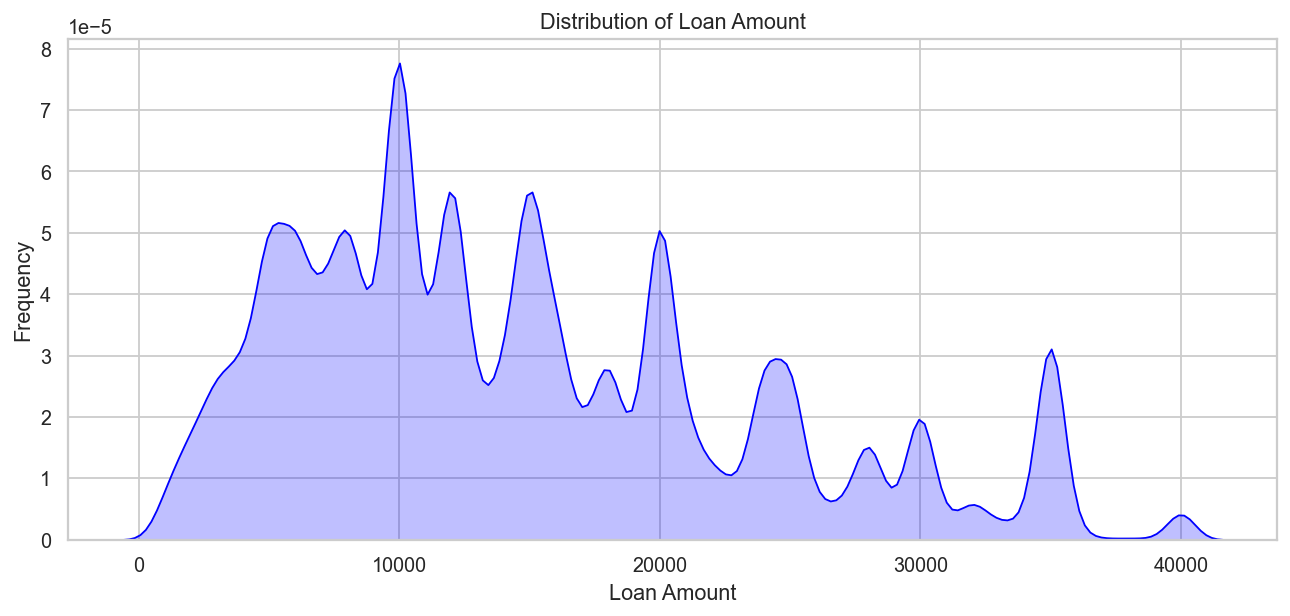

In [16]:
# Distribution of loan_amnt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.kdeplot(df['loan_amnt'],shade= True,color='blue')

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')

# Show the plot
plt.show()


In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.0,15959.770622,8829.782328,1000.0,9600.0,15000.0,21000.0,40000.0
Fully Paid,979419.0,14405.418391,8721.564037,1000.0,8000.0,12000.0,20000.0,40000.0


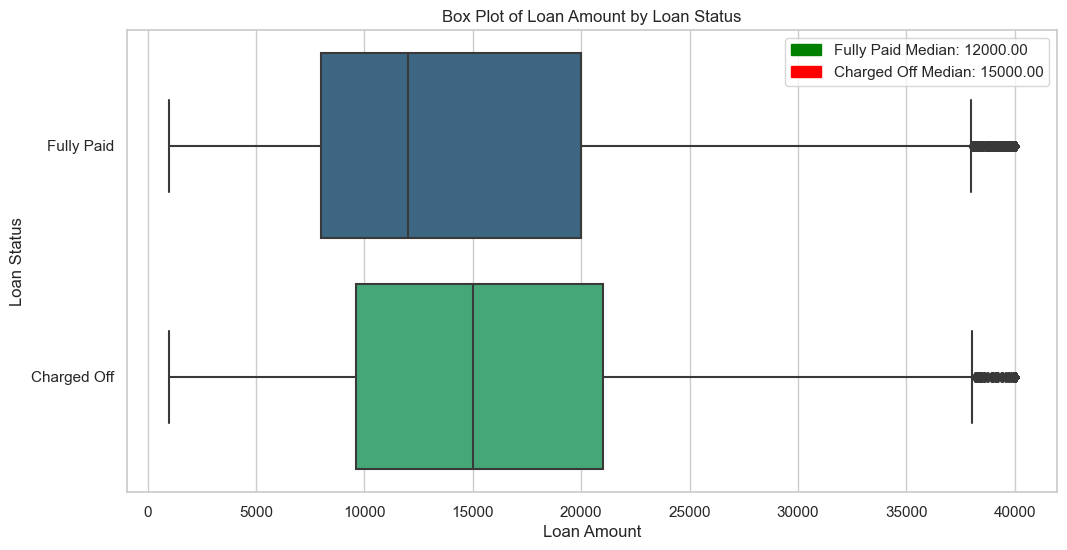

In [18]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='loan_amnt', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['loan_amnt'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['loan_amnt'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Box Plot of Loan Amount by Loan Status')
plt.show()

We can observe that on an average the chances of charge off is higher if the loan_amount is higher

### 2. int_rate 

In [19]:
df['int_rate'].describe()

count    1.220092e+06
mean     1.327424e+01
std      4.796682e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.602000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

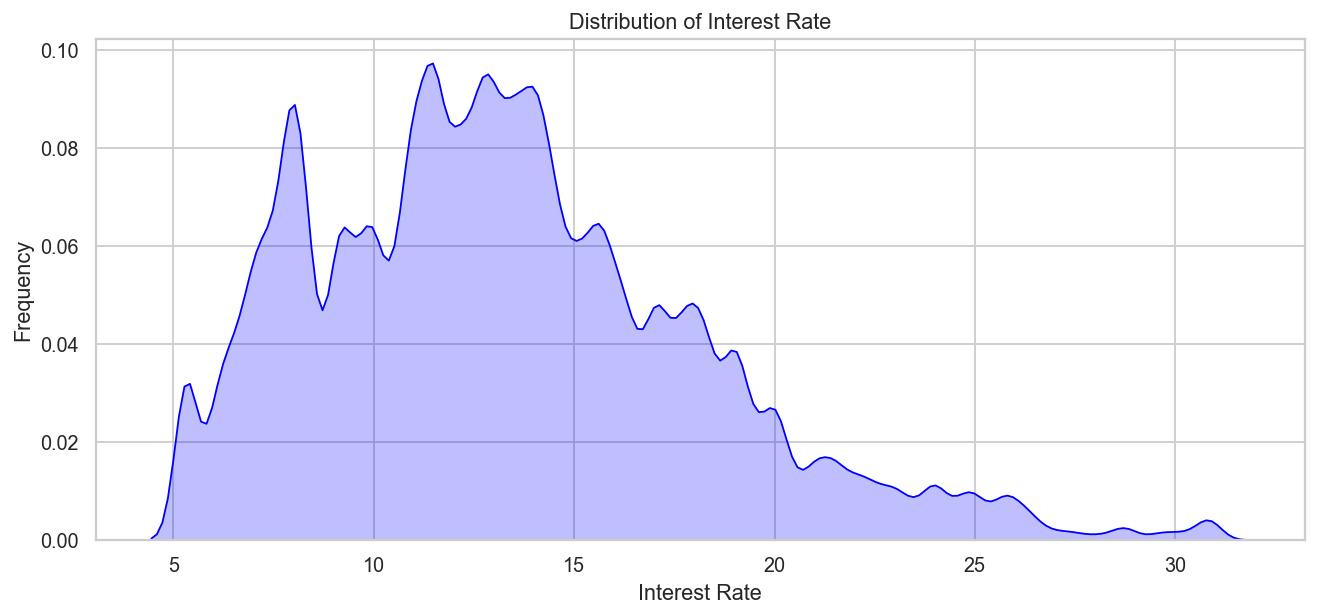

In [20]:
# Distribution of int_rate
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.kdeplot(df['int_rate'],shade= True,color='blue')

# Add labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rate')

# Show the plot
plt.show()


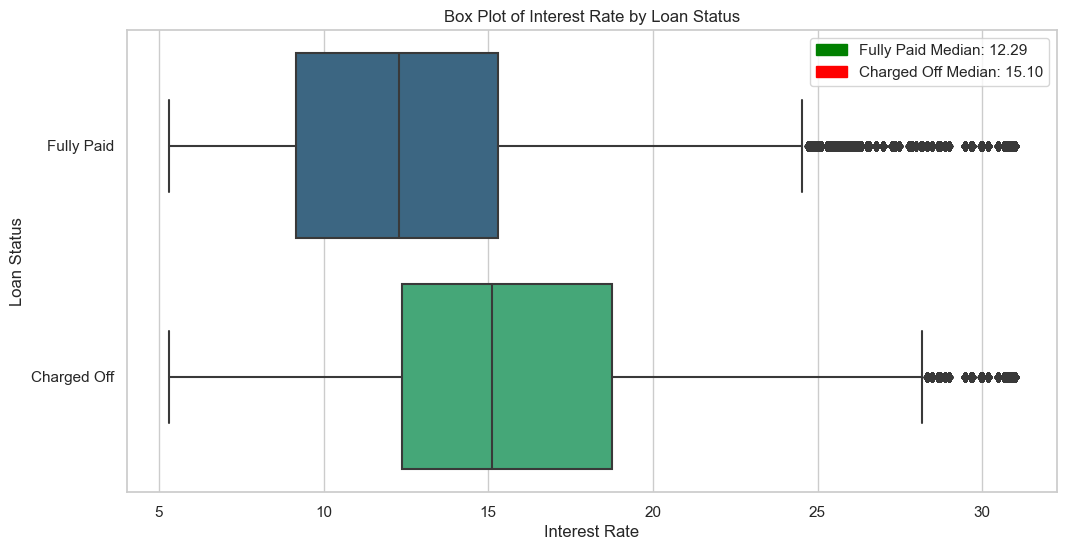

In [21]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='int_rate', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['int_rate'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['int_rate'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Box Plot of Interest Rate by Loan Status')
plt.show()

We can observe that the average interest rate is lower for fully paid loans compared to the chrged off ones

### 3. installment

In [22]:
df['installment'].describe()

count    1.220092e+06
mean     4.467739e+02
std      2.631637e+02
min      4.930000e+00
25%      2.553000e+02
50%      3.826300e+02
75%      5.930600e+02
max      1.719830e+03
Name: installment, dtype: float64

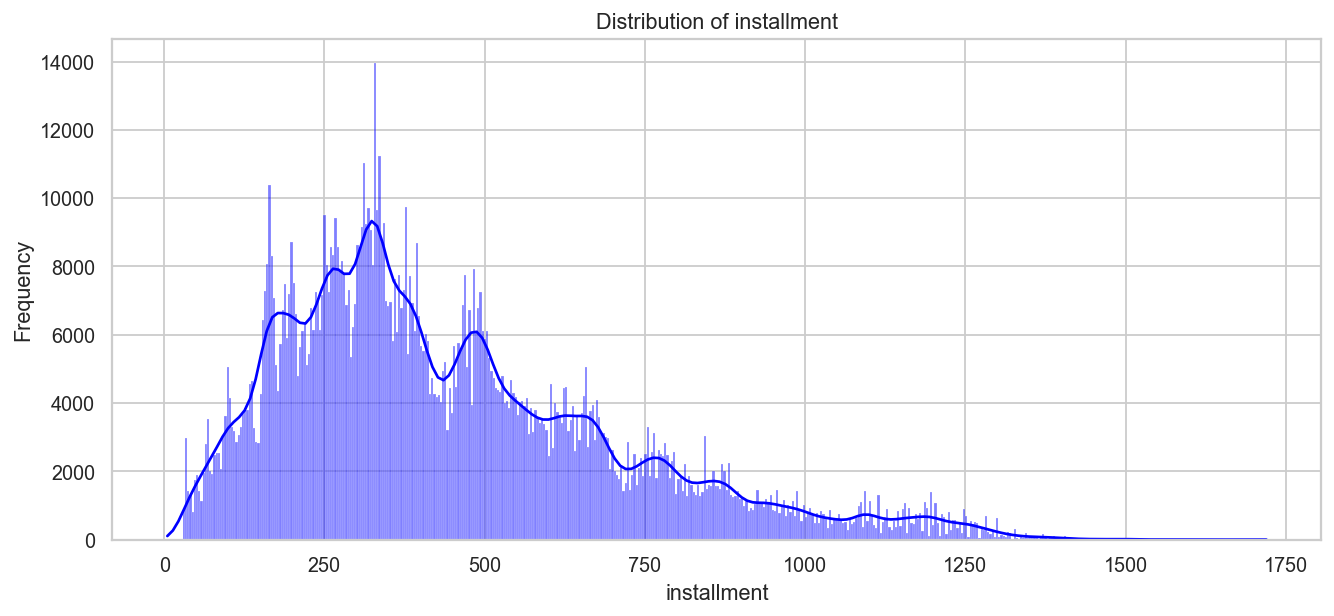

In [23]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df['installment'],bins =500, kde= True,color='blue')

# Add labels and title
plt.xlabel('installment')
plt.ylabel('Frequency')
plt.title('Distribution of installment')

# Show the plot
plt.show()


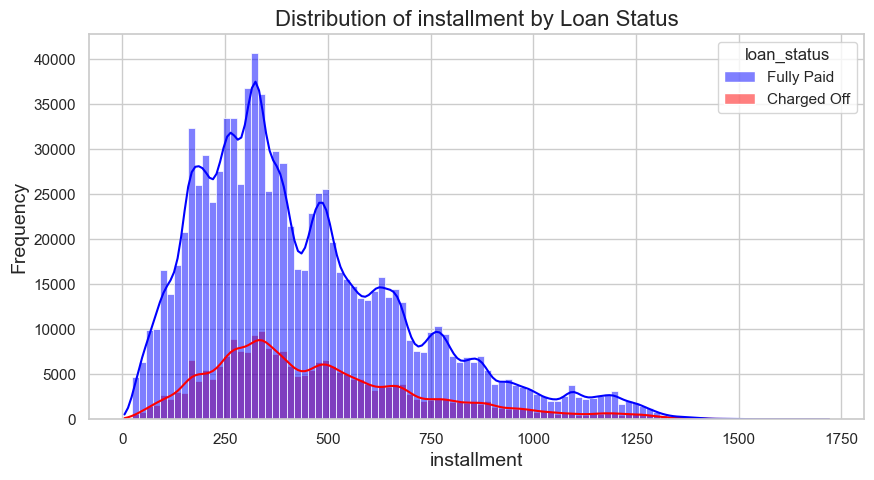

In [24]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='installment', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('installment', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of installment by Loan Status', fontsize=16, )

# Show plot
plt.show()


In [25]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.0,476.348070,263.863889,21.62,284.54,415.93,620.75,1717.63
Fully Paid,979419.0,439.506684,262.482014,4.93,248.45,375.49,584.96,1719.83


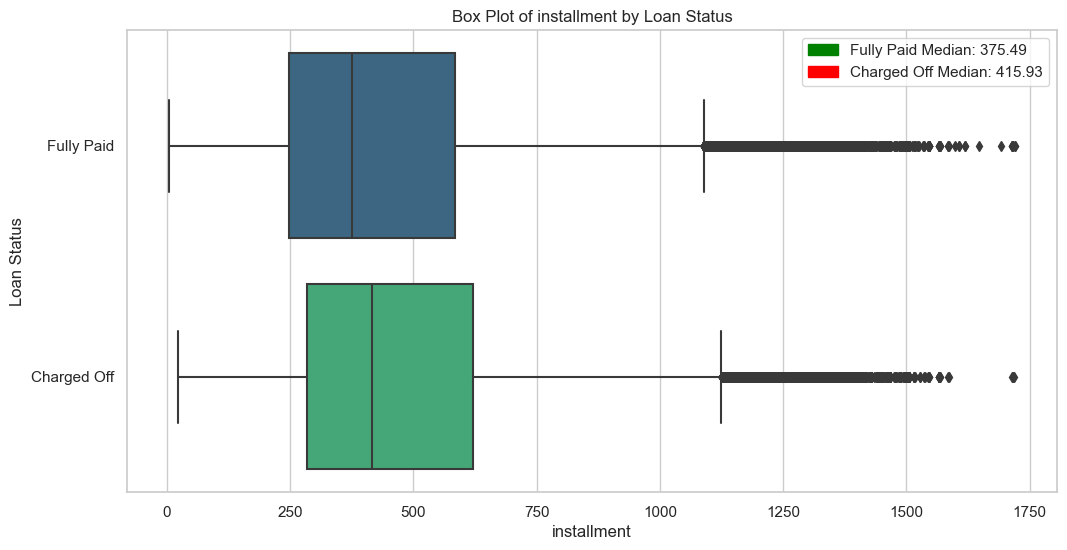

In [26]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='installment', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['installment'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['installment'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('installment')
plt.ylabel('Loan Status')
plt.title('Box Plot of installment by Loan Status')
plt.show()

Avg installment is hifgher for charged off, will retain this ferature

### 4. annual_inc

In [29]:
df[df['annual_inc'] <= 0].sum().sum()

0.0

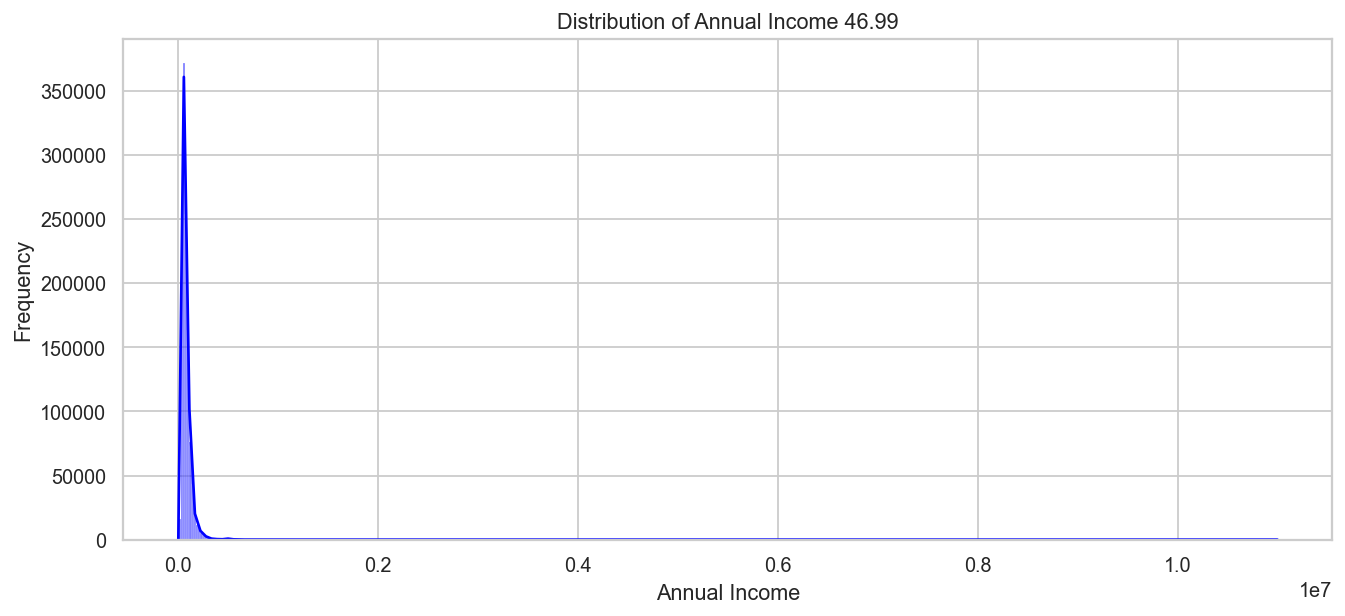

In [32]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df['annual_inc'],bins =500, kde= True,color='blue')

skewness = df['annual_inc'].skew()

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title(f'Distribution of Annual Income {skewness:.2f}')

# Show the plot
plt.show()


The salary distribution is highly skewed towards right.

In [26]:
pd.options.display.float_format = '{:.2f}'.format
description = df['annual_inc'].describe()
print(description)

count    1220092.00
mean       78196.50
std        71337.65
min           33.00
25%        48000.00
50%        65000.00
75%        93000.00
max     10999200.00
Name: annual_inc, dtype: float64


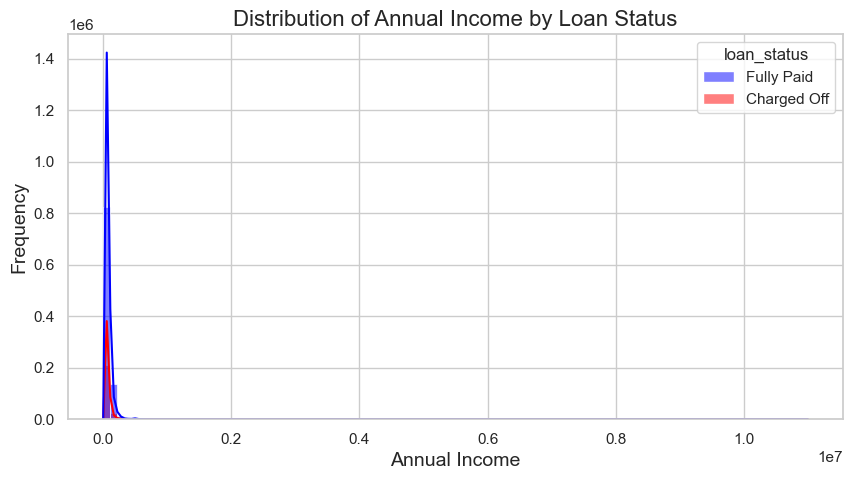

In [33]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='annual_inc', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('Annual Income', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of Annual Income by Loan Status', fontsize=16, )

# Show plot
plt.show()


In [34]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.0,72675.061103,67010.761944,100.0,45000.0,62000.0,85650.0,9500000.0
Fully Paid,979419.0,79553.281615,72296.833695,33.0,48600.0,67500.0,95000.0,10999200.0


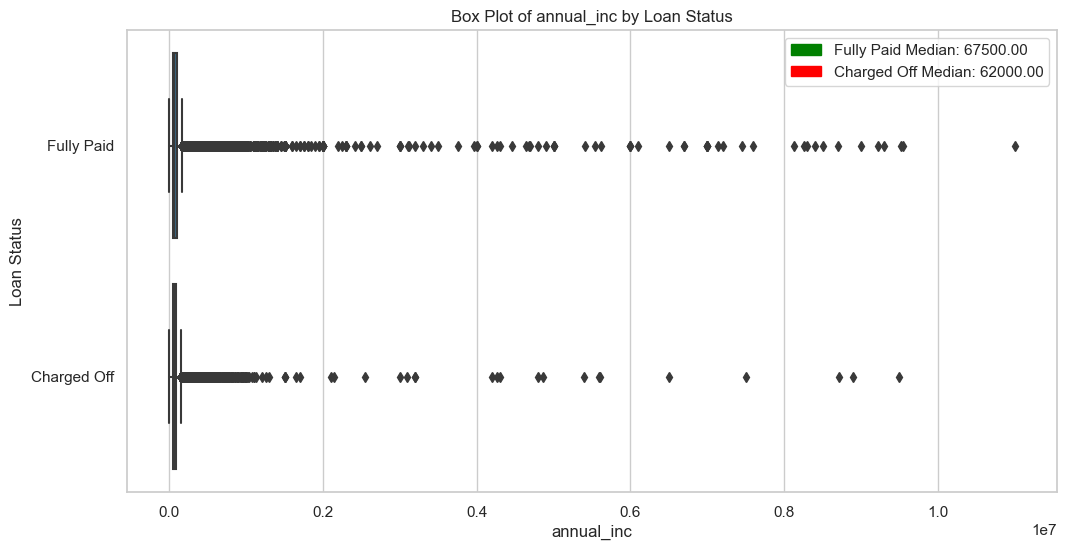

In [35]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='annual_inc', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['annual_inc'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['annual_inc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('annual_inc')
plt.ylabel('Loan Status')
plt.title('Box Plot of annual_inc by Loan Status')
plt.show()

### 5. dti

In [36]:
df['dti'].describe()

count    1.220092e+06
mean     1.830400e+01
std      9.619634e+00
min     -1.000000e+00
25%      1.191000e+01
50%      1.769000e+01
75%      2.414000e+01
max      9.990000e+02
Name: dti, dtype: float64

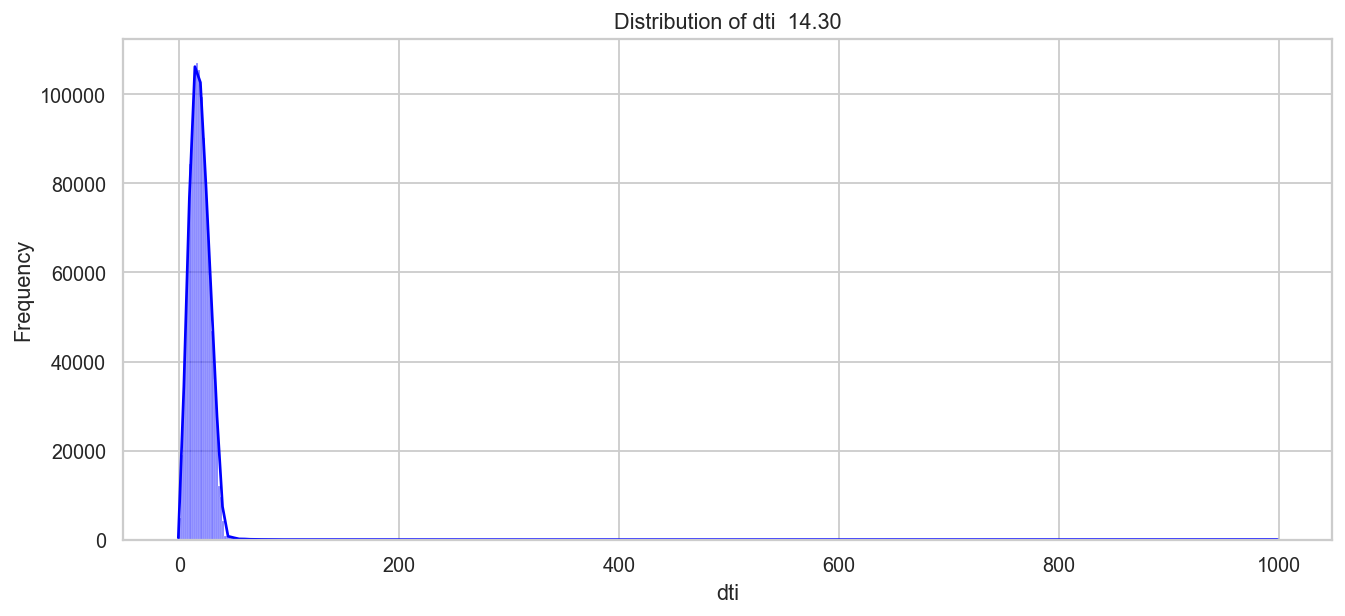

In [38]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df['dti'],bins =500, kde= True,color='blue')

skewness = df['dti'].skew()

# Add labels and title
plt.xlabel('dti')
plt.ylabel('Frequency')
plt.title(f'Distribution of dti {skewness: .2f}')

# Show the plot
plt.show()


The dti distribution is highly skewed towards right.

In [39]:
pd.options.display.float_format = '{:.2f}'.format
description = df['dti'].describe()
print(description)

count   1220092.00
mean         18.30
std           9.62
min          -1.00
25%          11.91
50%          17.69
75%          24.14
max         999.00
Name: dti, dtype: float64


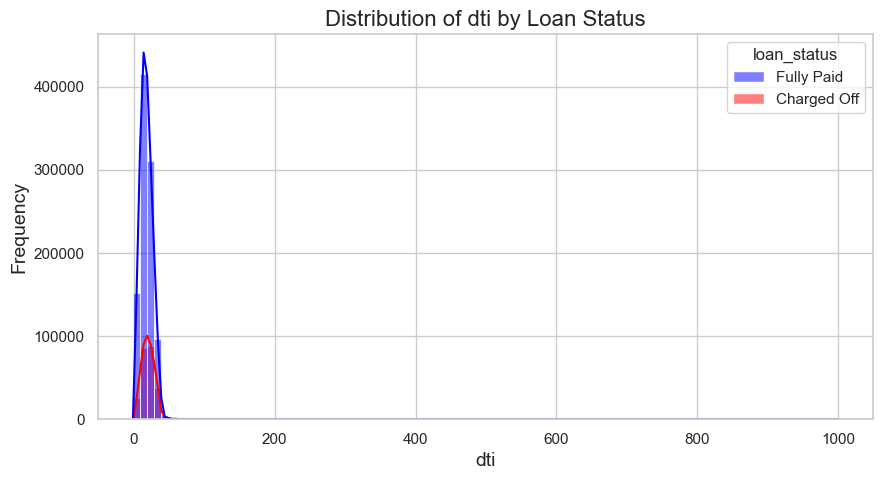

In [41]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='dti', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('dti', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of dti by Loan Status', fontsize=16, )

# Show plot
plt.show()


In [42]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,20.14,9.85,0.00,13.65,19.83,26.34,999.00
Fully Paid,979419.00,17.85,9.51,-1.00,11.55,17.19,23.54,999.00


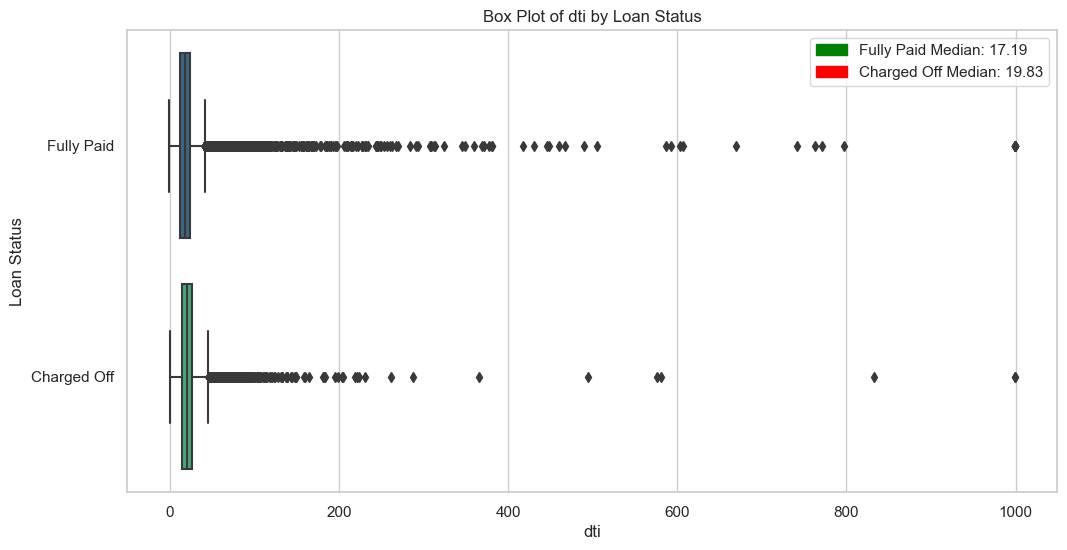

In [43]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='dti', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['dti'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['dti'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('dti')
plt.ylabel('Loan Status')
plt.title('Box Plot of dti by Loan Status')
plt.show()

### 6. and 7.  fico_range_low and fico_range_high

From the above correlation matrix we can see that these 2 features are highly correlated. So we explore their distribution

In [44]:
df['fico_range_high'].describe()

count   1220092.00
mean        699.45
std          31.32
min         664.00
25%         674.00
50%         694.00
75%         714.00
max         850.00
Name: fico_range_high, dtype: float64

In [45]:
df['fico_range_low'].describe()

count   1220092.00
mean        695.45
std          31.32
min         660.00
25%         670.00
50%         690.00
75%         710.00
max         845.00
Name: fico_range_low, dtype: float64

Both fico_range_high and fico_range_low exhibit comparable statistics. Therefore, we will utilize the average of both scores. and drop the individual scores

In [46]:
df['fico_avg'] = (df['fico_range_high'] + df['fico_range_low']) / 2

In [47]:
df = df.drop(['fico_range_high', 'fico_range_low'], axis=1)

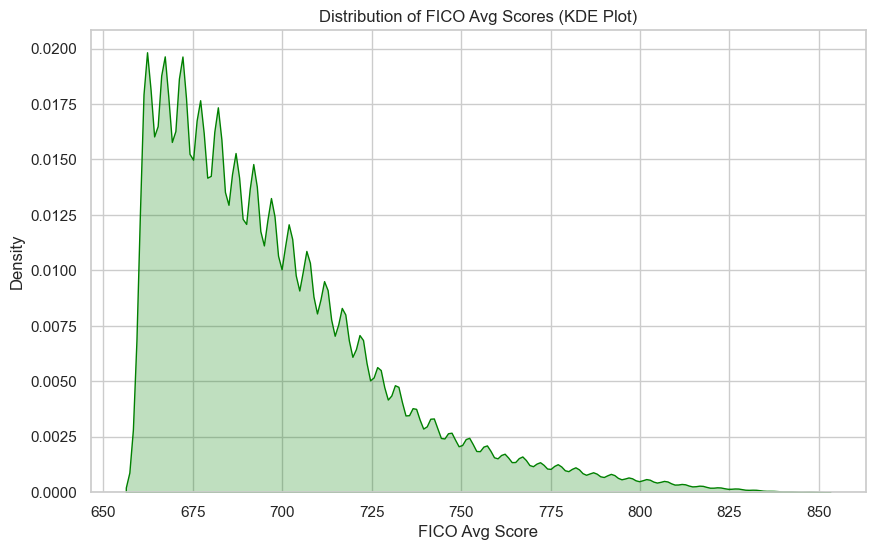

In [48]:
import matplotlib.pyplot as plt

# Plot KDE plot of FICO scores
plt.figure(figsize=(10, 6))
sns.kdeplot(df['fico_avg'], shade=True, color='green')
plt.xlabel('FICO Avg Score')
plt.ylabel('Density')
plt.title('Distribution of FICO Avg Scores (KDE Plot)')
plt.grid(True)
plt.show()


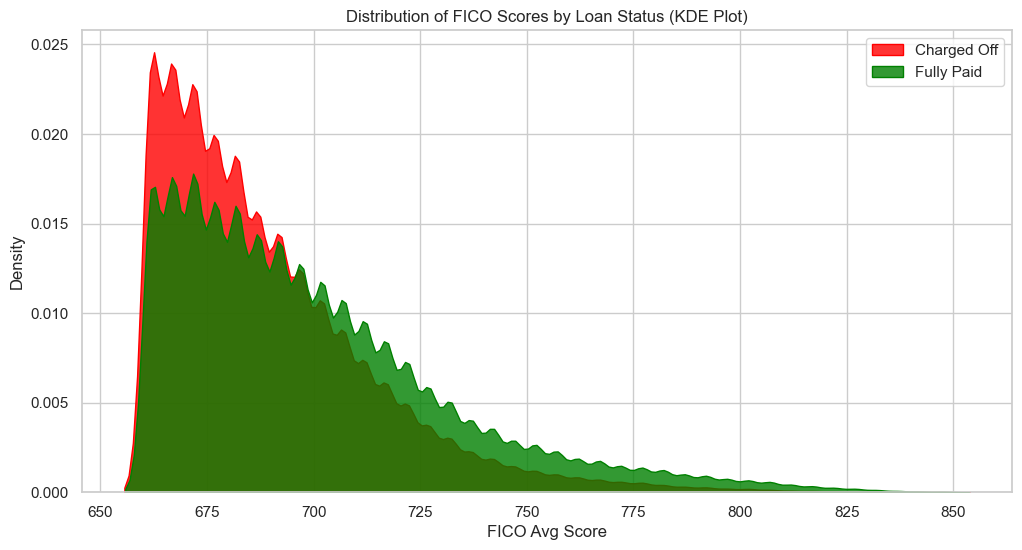

In [49]:
import seaborn as sns

# Plot KDE plots of FICO scores for fully paid and charged off loans
plt.figure(figsize=(12, 6))

sns.kdeplot(df[df['loan_status'] == 'Charged Off']['fico_avg'], shade=True, color='red', label='Charged Off', alpha=0.8)
sns.kdeplot(df[df['loan_status'] == 'Fully Paid']['fico_avg'], shade=True, color='green', label='Fully Paid', alpha=0.8)

plt.xlabel('FICO Avg Score')
plt.ylabel('Density')
plt.title('Distribution of FICO Scores by Loan Status (KDE Plot)')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
df.groupby('loan_status')['fico_avg'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,689.24,25.30,662.00,672.00,682.00,702.00,847.50
Fully Paid,979419.00,699.46,32.31,662.00,677.00,692.00,717.00,847.50


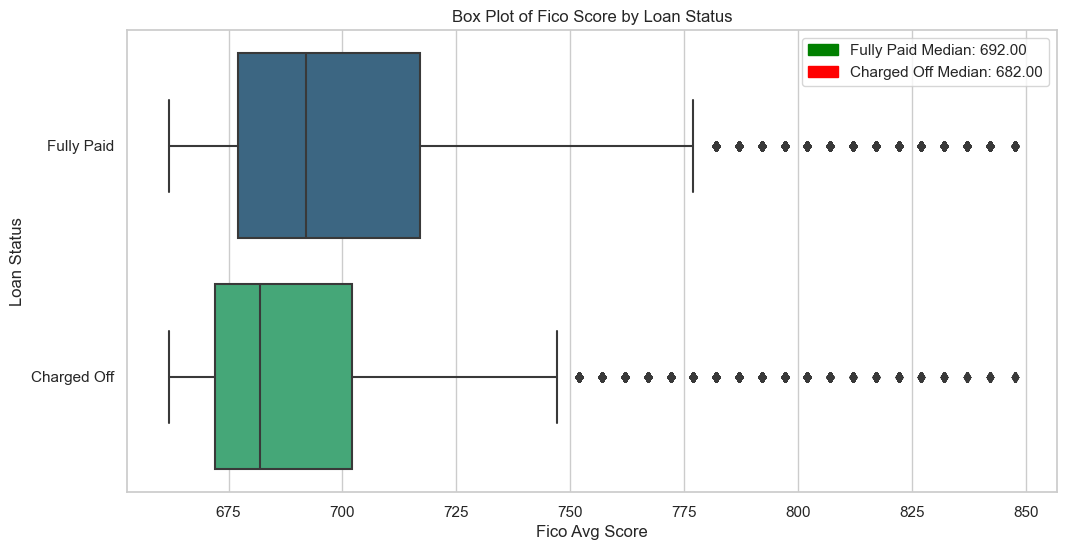

In [51]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='fico_avg', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['fico_avg'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['fico_avg'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Fico Avg Score')
plt.ylabel('Loan Status')
plt.title('Box Plot of Fico Score by Loan Status')
plt.show()

People with higher credit score have better repayment of loan

### 8. open_acc

In [52]:

df['open_acc'].describe()

count   1220092.00
mean         11.76
std           5.51
min           1.00
25%           8.00
50%          11.00
75%          15.00
max          90.00
Name: open_acc, dtype: float64

Text(0.5, 1.0, 'Open Acc Skewness:  1.30')

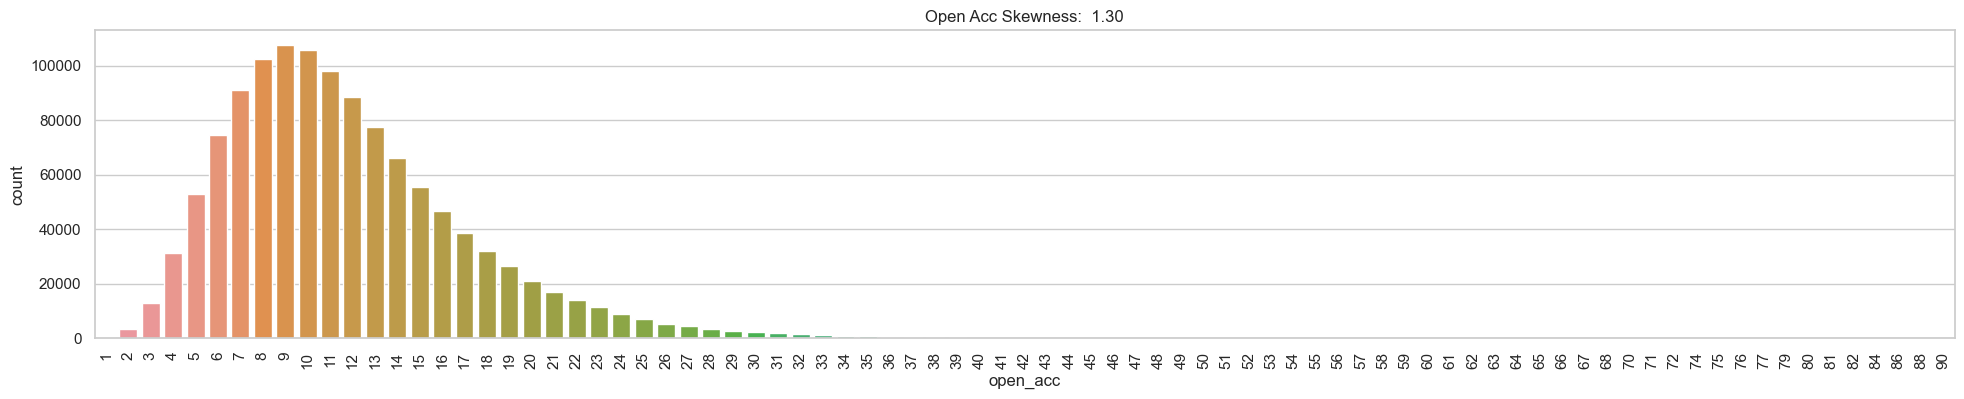

In [55]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
skewness = df['open_acc'].skew()
sns.countplot(data=df, x='open_acc')
plt.title(f"Open Acc Skewness: {skewness: .2f}")


Distribution is highly skewed to the right, there fore we remove try to remove outliers to make it less skeweda

In [56]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,12.12,5.68,1.00,8.00,11.00,15.00,76.00
Fully Paid,979419.00,11.68,5.46,1.00,8.00,11.00,14.00,90.00


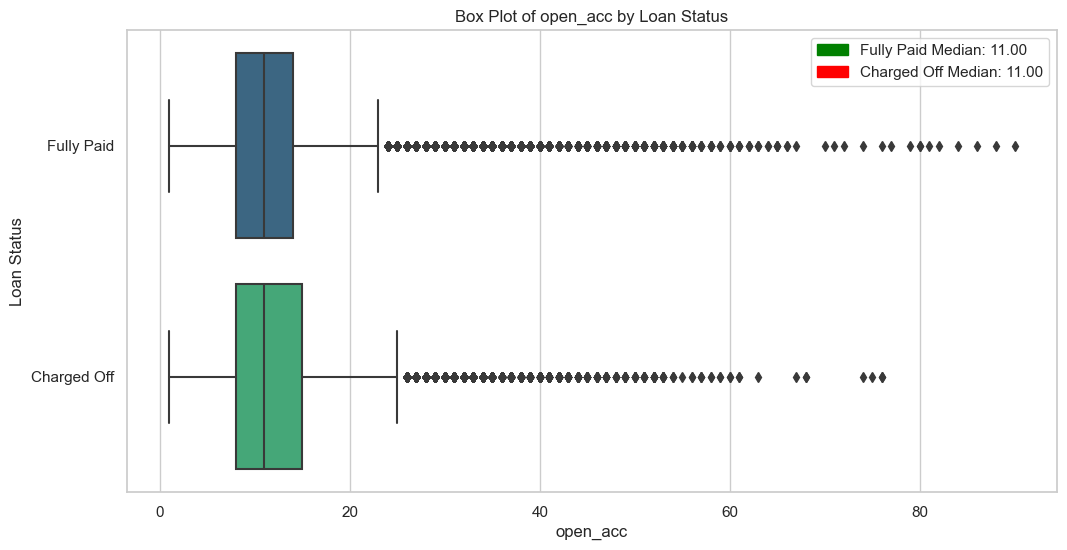

In [57]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='open_acc', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['open_acc'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['open_acc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('open_acc')
plt.ylabel('Loan Status')
plt.title('Box Plot of open_acc by Loan Status')
plt.show()

### 9. pub_rec

In [58]:
df['pub_rec'].describe()

count   1220092.00
mean          0.22
std           0.61
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          86.00
Name: pub_rec, dtype: float64

<Axes: xlabel='pub_rec', ylabel='count'>

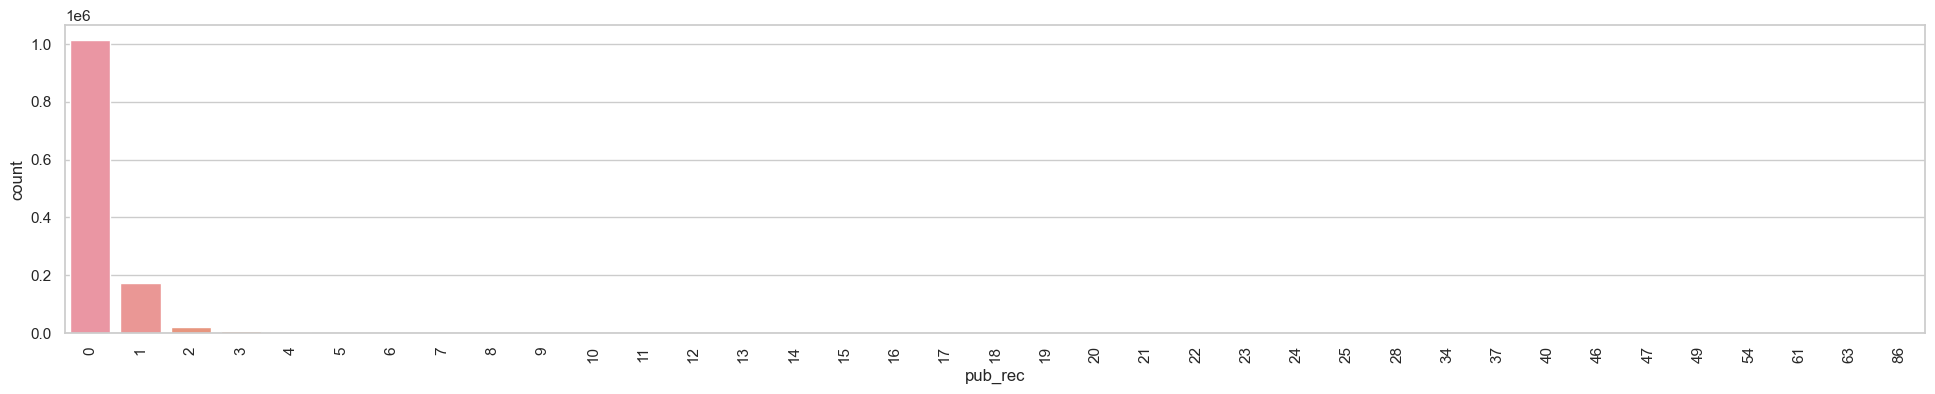

In [59]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='pub_rec')

<Axes: xlabel='pub_rec', ylabel='count'>

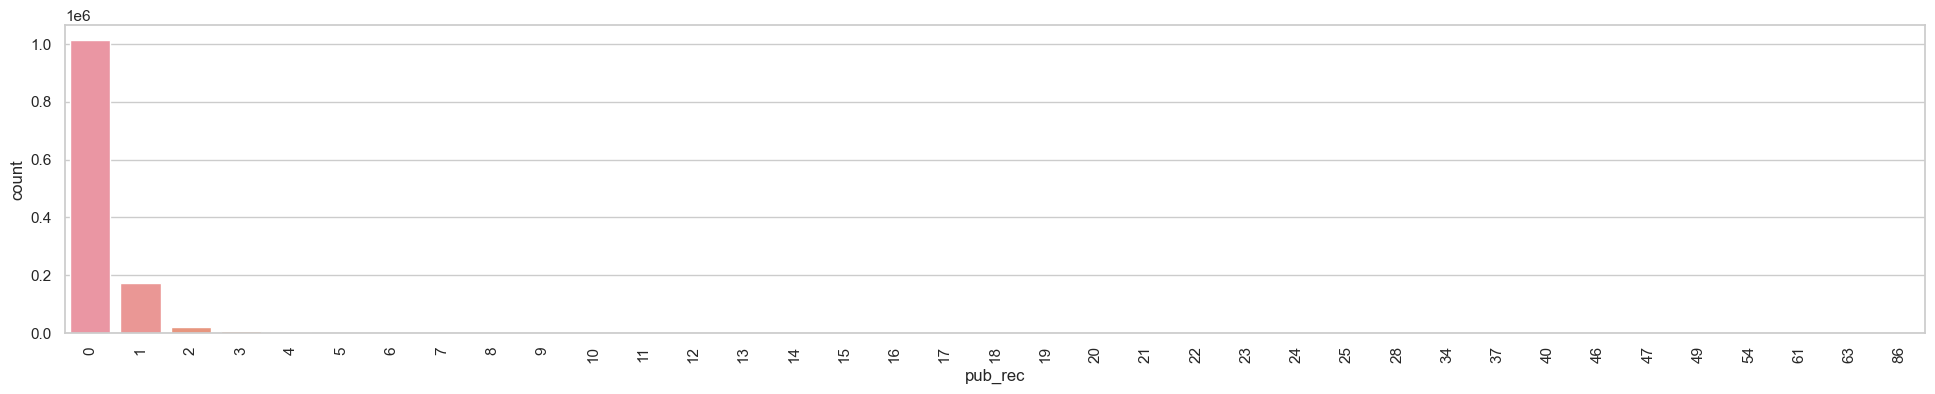

In [60]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='pub_rec')

In [63]:
loan_status_counts = df.groupby('pub_rec')['loan_status'].value_counts()
loan_status_counts

pub_rec  loan_status
0        Fully Paid     819700
         Charged Off    194907
1        Fully Paid     133524
         Charged Off     37884
2        Fully Paid      17192
         Charged Off      5214
3        Fully Paid       5279
         Charged Off      1529
4        Fully Paid       1833
         Charged Off       593
5        Fully Paid        913
         Charged Off       263
6        Fully Paid        441
         Charged Off       146
7        Fully Paid        213
         Charged Off        53
8        Fully Paid        116
         Charged Off        26
9        Fully Paid         61
         Charged Off        15
10       Fully Paid         43
         Charged Off         7
11       Fully Paid         29
         Charged Off         8
12       Fully Paid         18
         Charged Off         8
13       Fully Paid         16
         Charged Off         2
14       Fully Paid          3
         Charged Off         1
15       Fully Paid          5
         Charged O

In [65]:

df['pub_rec_category'] = pd.cut(df['pub_rec'], bins=[-1, 0, 1, np.inf], labels=['0', '1', '2 or more'])

# Group by 'pub_rec_category' and 'loan_status', and count occurrences
loan_status_counts = df1.groupby('pub_rec_category')['loan_status'].value_counts()

# Display the counts
print(loan_status_counts)

pub_rec_category  loan_status
0                 Fully Paid     819700
                  Charged Off    194907
1                 Fully Paid     133524
                  Charged Off     37884
2 or more         Fully Paid      26195
                  Charged Off      7882
Name: count, dtype: int64


In [66]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,0.24,0.66,0.00,0.00,0.00,0.00,86.00
Fully Paid,979419.00,0.21,0.59,0.00,0.00,0.00,0.00,63.00


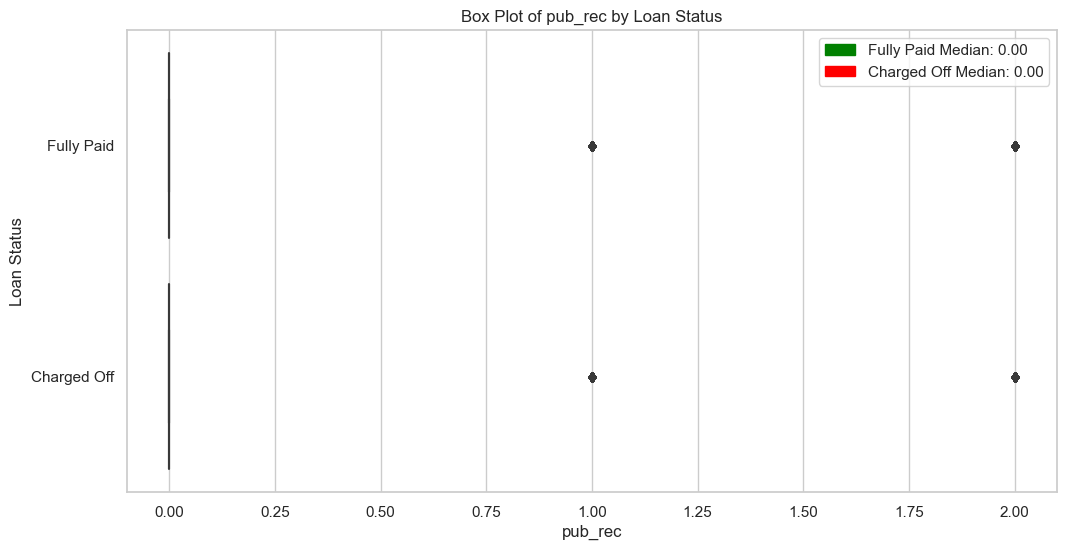

In [63]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='pub_rec', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['pub_rec'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['pub_rec'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])
plt.xlabel('pub_rec')
plt.ylabel('Loan Status')
plt.title('Box Plot of pub_rec by Loan Status')
plt.show()

There is slight difference in the average pub_rec for charged off and fully paid . We will retain this feature for now

### 10. revol_bal

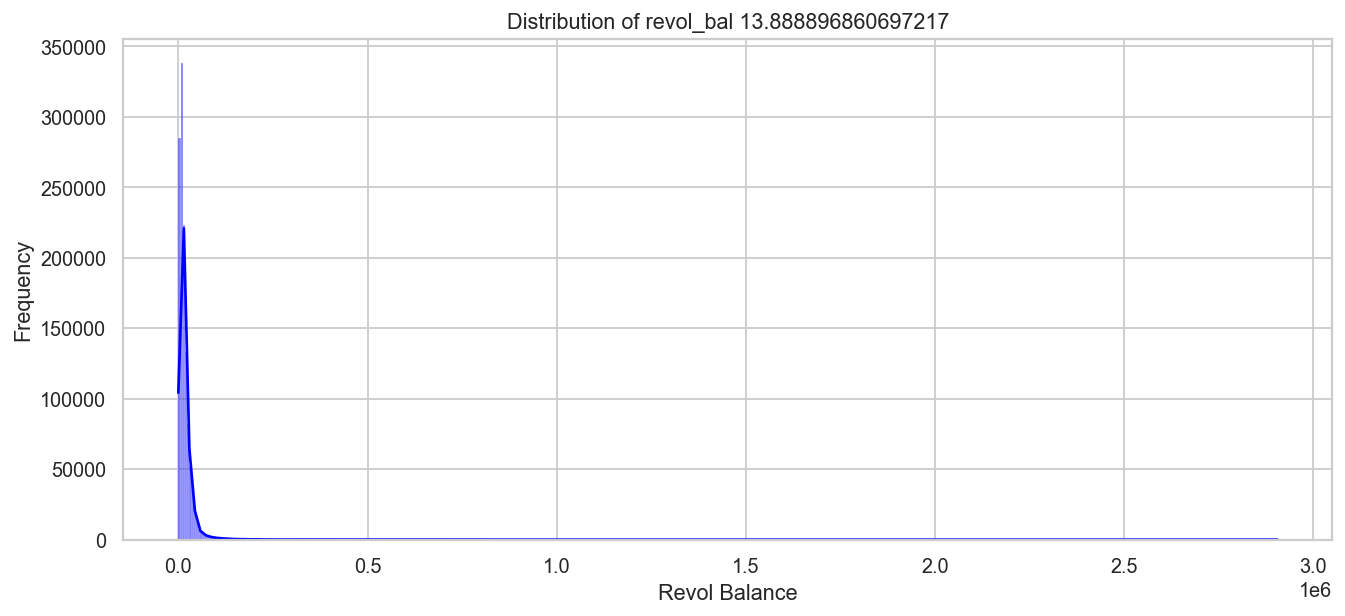

In [69]:
# Distribution of revol_bal
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of revol_bal 
sns.histplot(df['revol_bal'],bins =500, kde= True,color='blue')

skewness = df['revol_bal'].skew()

# Add labels and title
plt.xlabel('Revol Balance')
plt.ylabel('Frequency')
plt.title(f'Distribution of revol_bal {skewness}')

# Show the plot
plt.show()

The revol_bal distribution is highly skewed towards right.

In [65]:
pd.options.display.float_format = '{:.2f}'.format
description = df['revol_bal'].describe()
print(description)

count   1171080.00
mean      15912.66
std       19267.05
min           0.00
25%        6064.00
50%       11223.00
75%       19704.00
max      959754.00
Name: revol_bal, dtype: float64


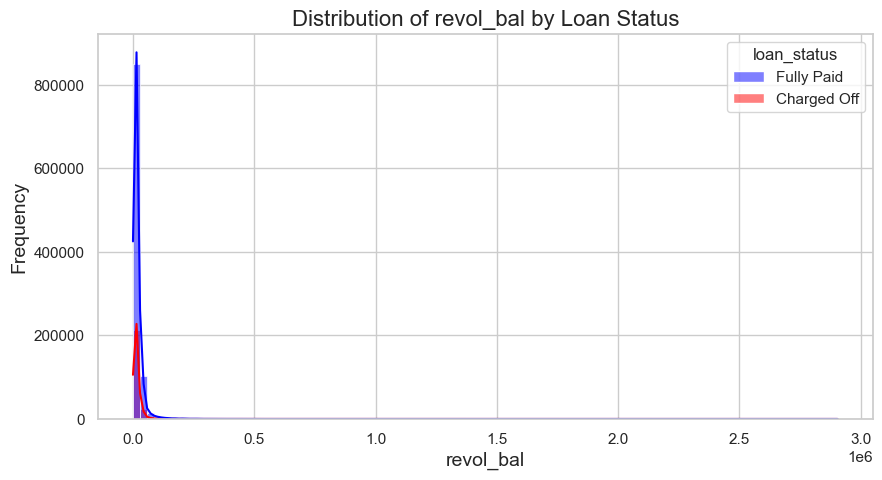

In [70]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='revol_bal', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('revol_bal', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of revol_bal by Loan Status', fontsize=16, )

# Show plot
plt.show()

In [71]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,15639.22,19348.69,0.00,6158.00,11300.00,19422.00,1746716.00
Fully Paid,979419.00,16768.95,23508.48,0.00,6101.00,11363.00,20233.00,2904836.00


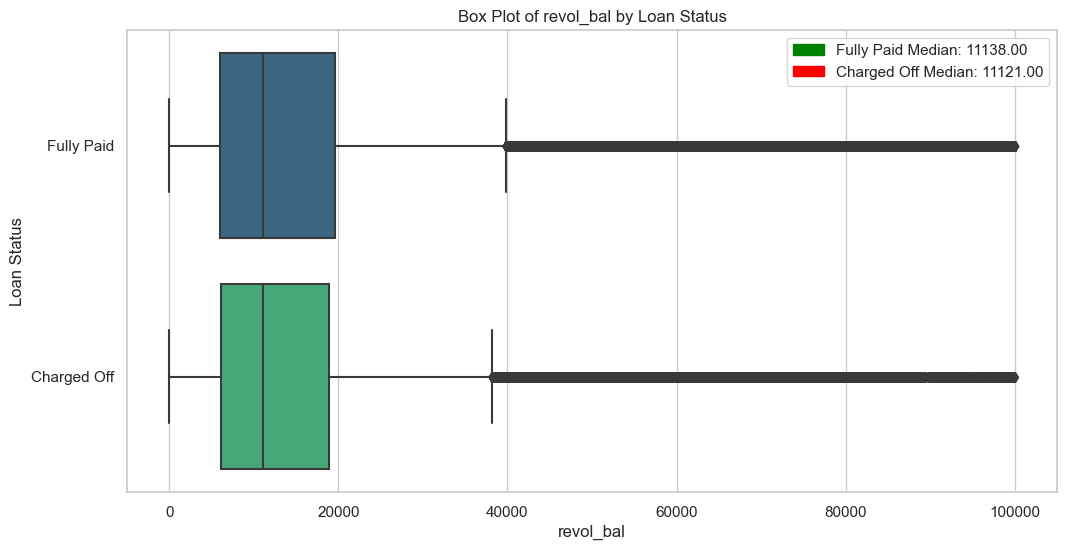

In [71]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['revol_bal'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['revol_bal'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])
plt.xlabel('revol_bal')
plt.ylabel('Loan Status')
plt.title('Box Plot of revol_bal by Loan Status')
plt.show()

lower the the balance higher the chance ofd charge off

### 11. revol_util

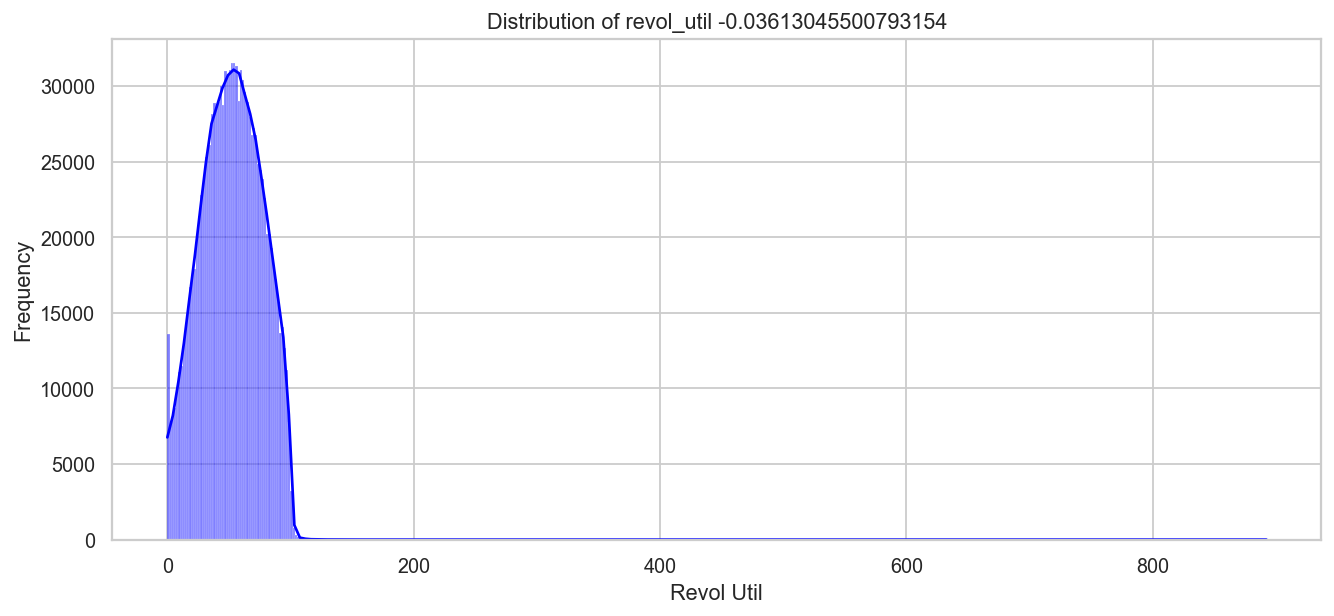

In [73]:
# Distribution of revol_util
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of revol_util
sns.histplot(df['revol_util'],bins =500, kde= True,color='blue')

skewness = df['revol_util'].skew()

# Add labels and title
plt.xlabel('Revol Util')
plt.ylabel('Frequency')
plt.title(f'Distribution of revol_util {skewness}')

# Show the plot
plt.show()

The revol_bal distribution is not highly skewed.

In [74]:
pd.options.display.float_format = '{:.2f}'.format
description = df['revol_util'].describe()
print(description)

count   1220092.00
mean         52.12
std          24.33
min           0.00
25%          34.00
50%          52.50
75%          70.90
max         892.30
Name: revol_util, dtype: float64


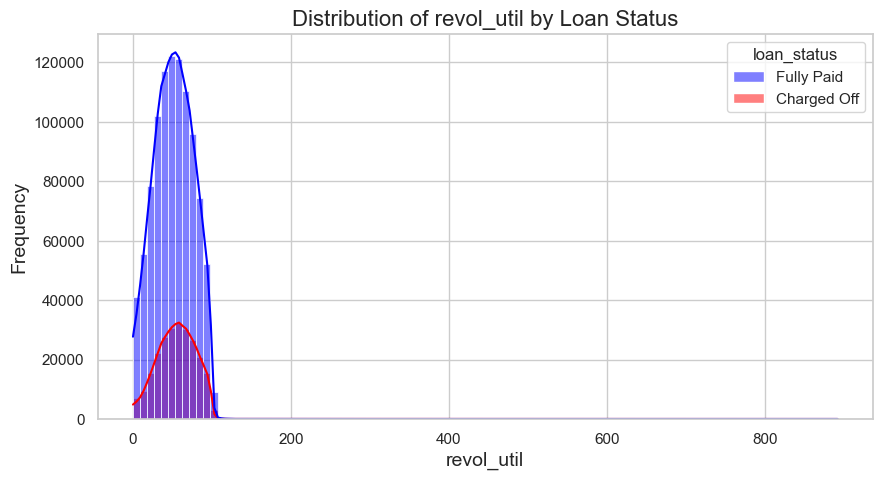

In [75]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='revol_util', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('revol_util', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of revol_util by Loan Status', fontsize=16, )

# Show plot
plt.show()

In [76]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,55.00,23.69,0.00,37.80,55.80,73.20,366.60
Fully Paid,979419.00,51.41,24.44,0.00,33.00,51.60,70.20,892.30


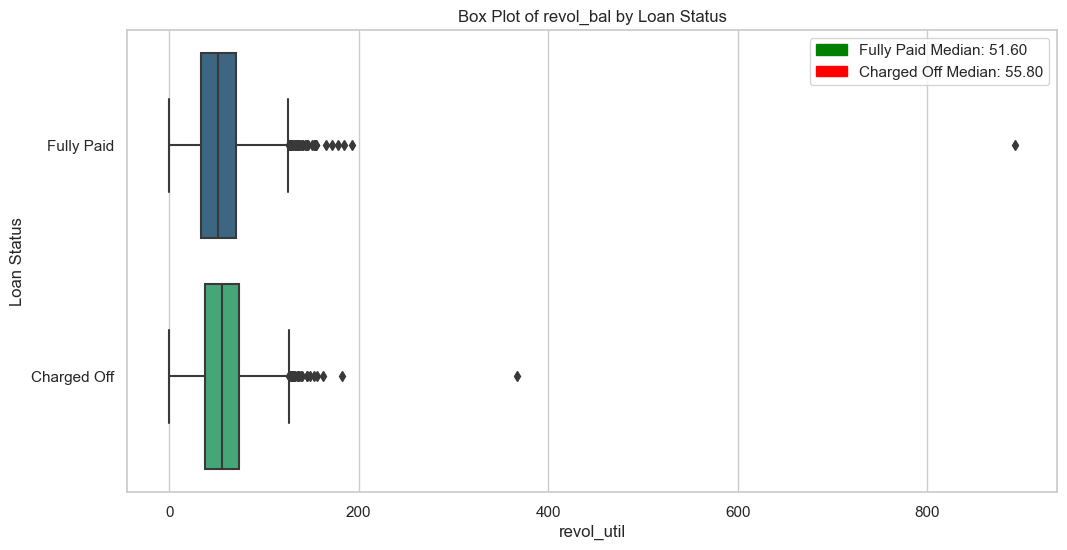

In [77]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='revol_util', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['revol_util'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['revol_util'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])
plt.xlabel('revol_util')
plt.ylabel('Loan Status')
plt.title('Box Plot of revol_bal by Loan Status')
plt.show()

### 12. total_acc

In [78]:
df['total_acc'].describe()

count   1220092.00
mean         25.18
std          12.02
min           2.00
25%          16.00
50%          23.00
75%          32.00
max         176.00
Name: total_acc, dtype: float64

Skewness: 0.9594093871090275


<Axes: xlabel='total_acc', ylabel='count'>

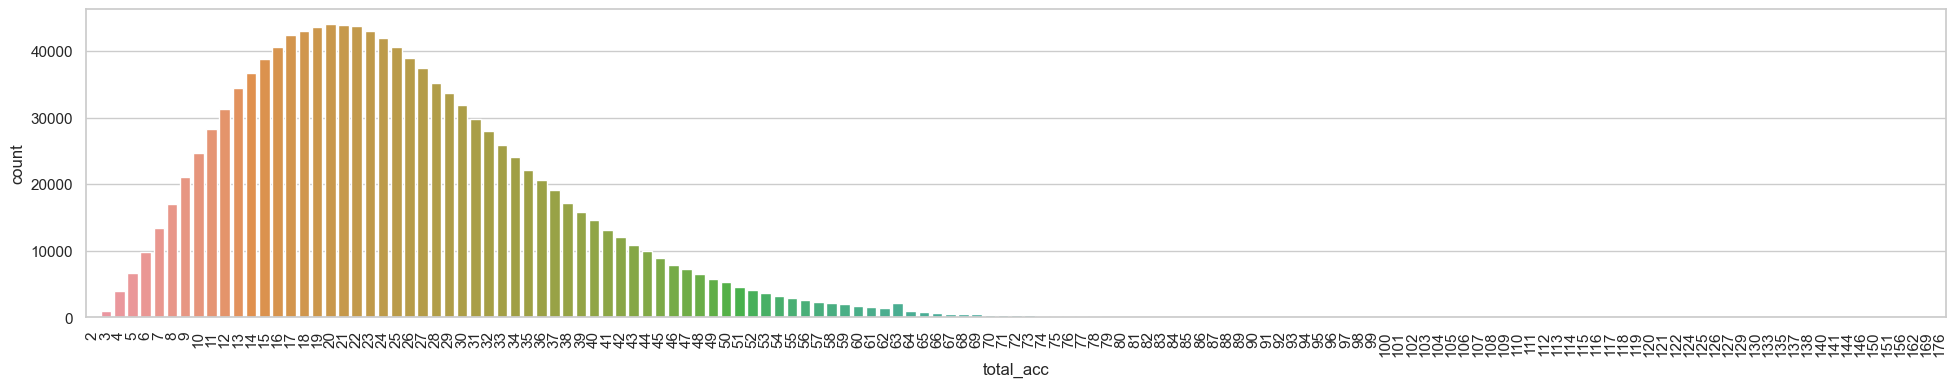

In [81]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
skewnes = df['total_acc'].skew()
print(f'Skewness: {skewnes}')
sns.countplot(data=df, x='total_acc')


Distribution is not that highly skewed to the right, there fore we remove try to remove outliers to make it less skewed

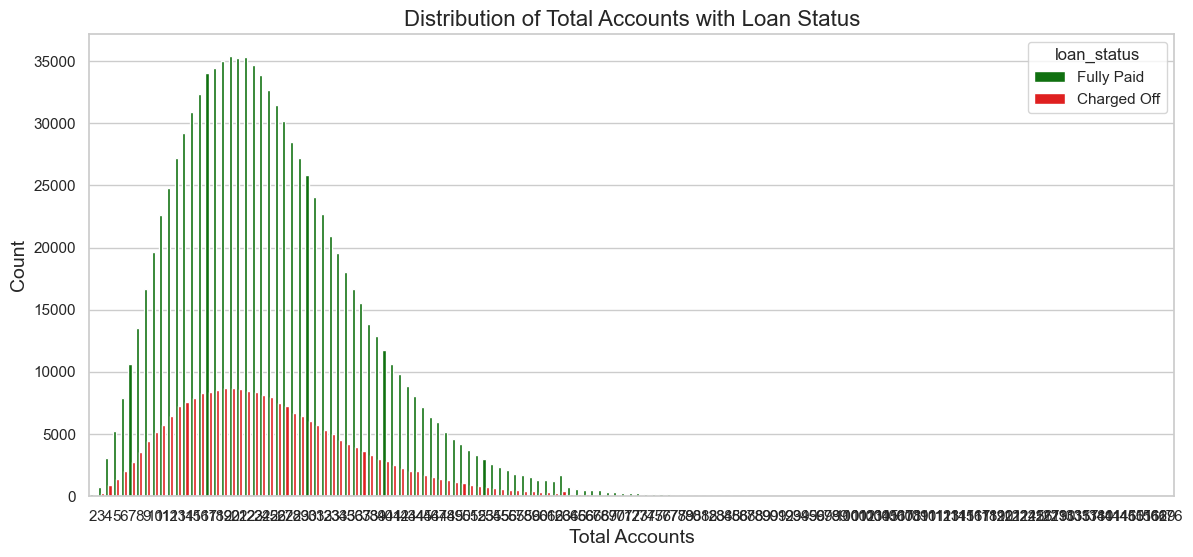

In [82]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='total_acc', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('Total Accounts', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Total Accounts with Loan Status', fontsize=16)

plt.show()

In [83]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,24.96,12.15,2.00,16.00,23.00,32.00,176.00
Fully Paid,979419.00,25.24,11.99,2.00,17.00,24.00,32.00,162.00


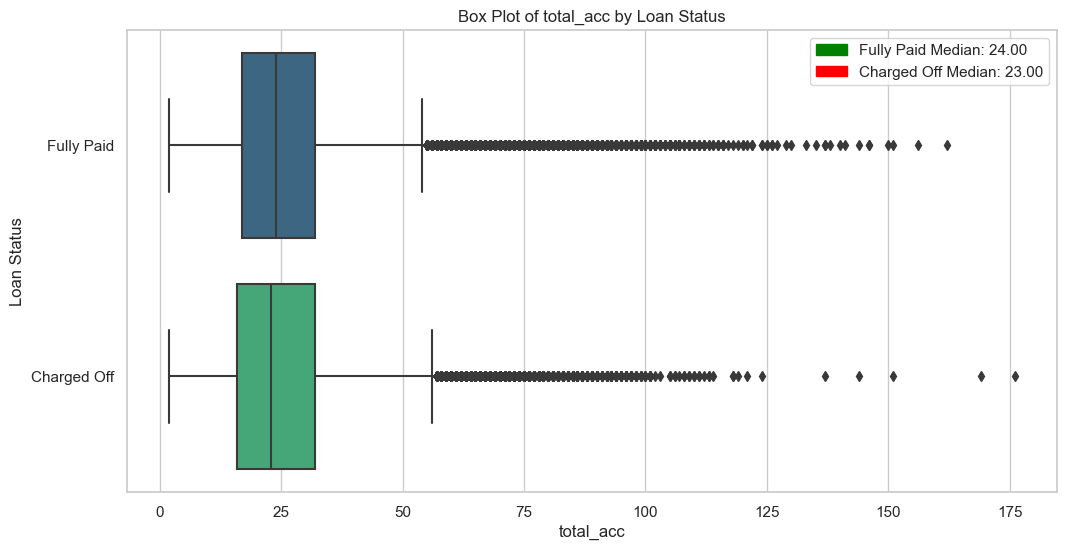

In [84]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='total_acc', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['total_acc'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['total_acc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])
plt.xlabel('total_acc')
plt.ylabel('Loan Status')
plt.title('Box Plot of total_acc by Loan Status')
plt.show()

### 13. mort_acc

In [85]:
df['mort_acc'].describe()

count   1220092.00
mean          1.66
std           2.00
min           0.00
25%           0.00
50%           1.00
75%           3.00
max          51.00
Name: mort_acc, dtype: float64

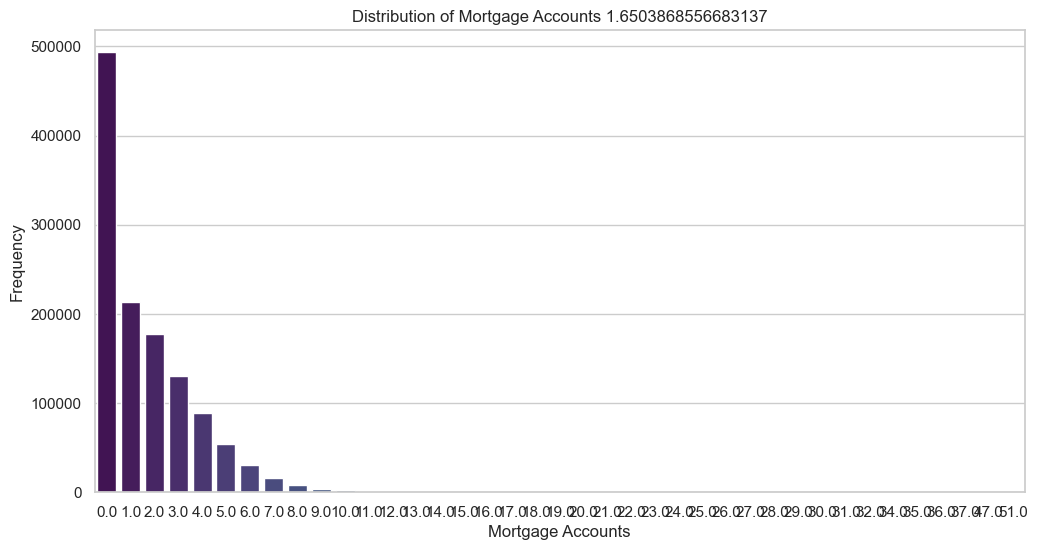

In [87]:
plt.figure(figsize=(12,6))
skewness = df['mort_acc'].skew()
sns.countplot(data=df, x='mort_acc', palette='viridis')
plt.xlabel('Mortgage Accounts')
plt.ylabel('Frequency')
plt.title(f'Distribution of Mortgage Accounts {skewness}')
plt.show()

Mortgage accounts is highly skewed from the right side. 

In [98]:
# Calculate value counts of 'loan_status' for each 'mort_acc' group
loan_status_counts = df.groupby('mort_acc')['loan_status'].value_counts()

# Calculate total number of records for each 'mort_acc' group
total_records_per_mort_acc = df.groupby('mort_acc')['loan_status'].count()

# Calculate percentage of records for each value count
percentage_loan_status_counts = loan_status_counts.div(total_records_per_mort_acc, level='mort_acc') * 100

# Print the percentage of records for each value count
print(percentage_loan_status_counts)


mort_acc  loan_status
0.00      Fully Paid     76.88
          Charged Off    23.12
1.00      Fully Paid     80.06
          Charged Off    19.94
2.00      Fully Paid     82.07
                         ...  
35.00     Fully Paid    100.00
36.00     Fully Paid    100.00
37.00     Fully Paid    100.00
47.00     Fully Paid    100.00
51.00     Fully Paid    100.00
Length: 66, dtype: float64


In [100]:
# Calculate total number of records in the DataFrame
total_records = len(df)

# Calculate total number of records for each 'mort_acc' value
total_records_per_mort_acc = df['mort_acc'].value_counts()

# Calculate percentage of records for each 'mort_acc' value
percentage_records_per_mort_acc = (total_records_per_mort_acc / total_records) * 100

# Print the percentage of records for each 'mort_acc' value
print(percentage_records_per_mort_acc)


mort_acc
0.00    40.46
1.00    17.50
2.00    14.57
3.00    10.68
4.00     7.26
5.00     4.40
6.00     2.48
7.00     1.28
8.00     0.64
9.00     0.33
10.00    0.17
11.00    0.09
12.00    0.05
13.00    0.03
14.00    0.02
15.00    0.01
16.00    0.01
17.00    0.00
18.00    0.00
19.00    0.00
20.00    0.00
21.00    0.00
22.00    0.00
24.00    0.00
23.00    0.00
27.00    0.00
25.00    0.00
26.00    0.00
29.00    0.00
34.00    0.00
28.00    0.00
30.00    0.00
32.00    0.00
37.00    0.00
31.00    0.00
47.00    0.00
35.00    0.00
51.00    0.00
36.00    0.00
Name: count, dtype: float64


In [102]:
# Define the bins for categorization
bins = [-np.inf, 1, 2, 3, 4, np.inf]

# Define the labels for each category
labels = ['1', '2', '3', '4', '5 or more']

# Categorize 'mort_acc' column into bins
df['mort_acc_category'] = pd.cut(df['mort_acc'], bins=bins, labels=labels, right=False)



In [104]:
df['mort_acc_category'].value_counts()

mort_acc_category
1            493618
2            213537
5 or more    204807
3            177771
4            130359
Name: count, dtype: int64

In [103]:
loan_status_counts = df.groupby('mort_acc_category')['loan_status'].value_counts()
print(loan_status_counts)

mort_acc_category  loan_status
1                  Fully Paid     379517
                   Charged Off    114101
2                  Fully Paid     170965
                   Charged Off     42572
3                  Fully Paid     145892
                   Charged Off     31879
4                  Fully Paid     108749
                   Charged Off     21610
5 or more          Fully Paid     174296
                   Charged Off     30511
Name: count, dtype: int64


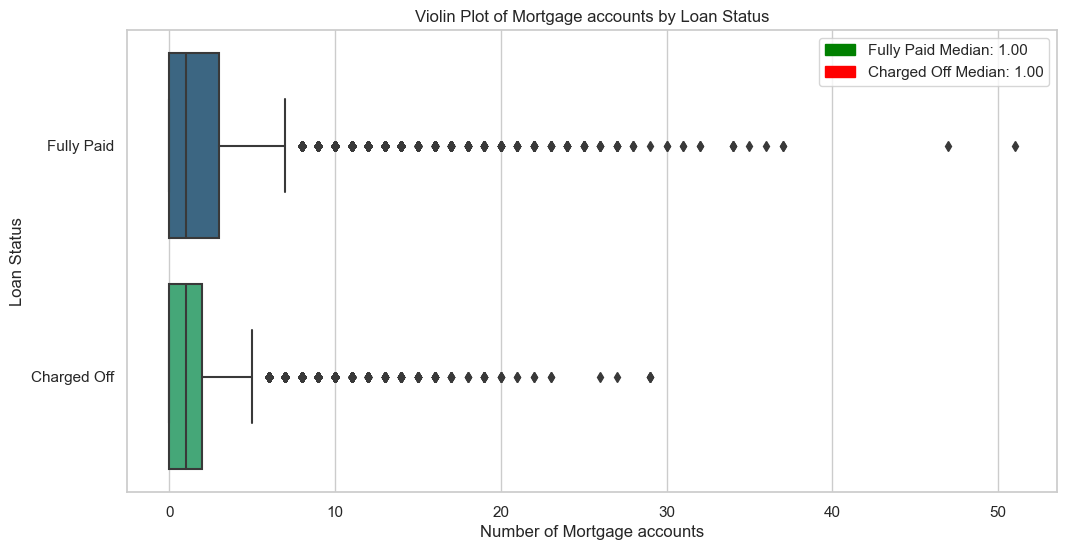

In [105]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='mort_acc', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['mort_acc'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['mort_acc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Number of Mortgage accounts')
plt.ylabel('Loan Status')
plt.title('Violin Plot of Mortgage accounts by Loan Status')
plt.show()

Not very clear, though the median is same...I intend to keep it for further analysisa

### 14. pub_rec_bankruptcies

In [107]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_values = abs(numeric_columns.corr()['pub_rec_bankruptcies']).sort_values(ascending=False)[1:5]
display(correlation_values)

pub_rec     0.64
fico_avg    0.20
revol_bal   0.12
loan_amnt   0.09
Name: pub_rec_bankruptcies, dtype: float64

The correlation has increase with further cleaning and preprocessing

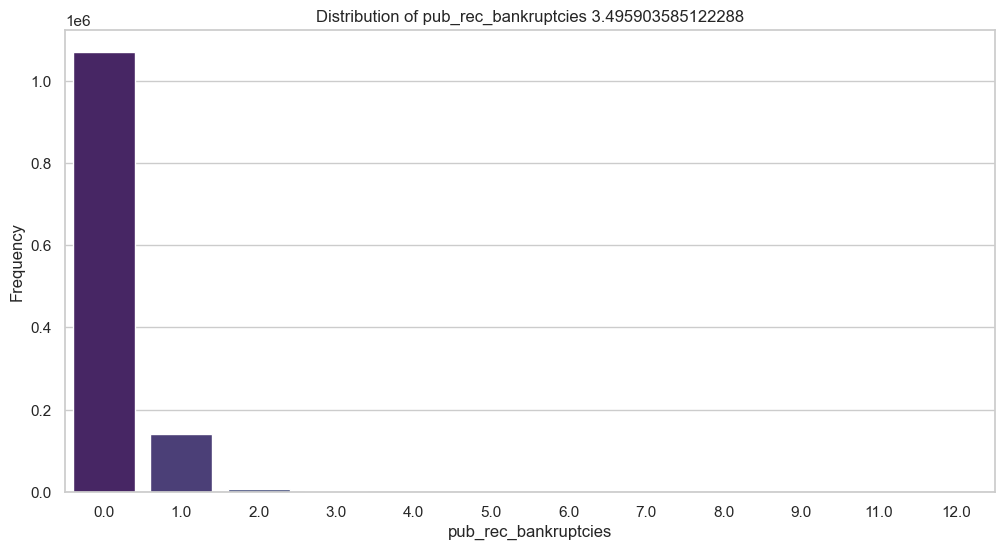

In [110]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='pub_rec_bankruptcies', palette='viridis')
skewness = df['pub_rec_bankruptcies'].skew()
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Frequency')
plt.title(f'Distribution of pub_rec_bankruptcies {skewness}')
plt.show()

Dropping pub_rec_bankruptcies as it is highly correlated to pub_rec

In [111]:
df = df.drop('pub_rec_bankruptcies', axis=1)

### 15. term

<Axes: xlabel='term (months)', ylabel='count'>

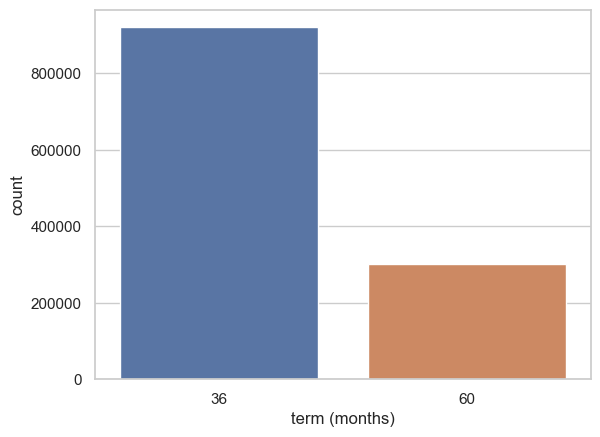

In [112]:
sns.countplot(data=df, x='term (months)')



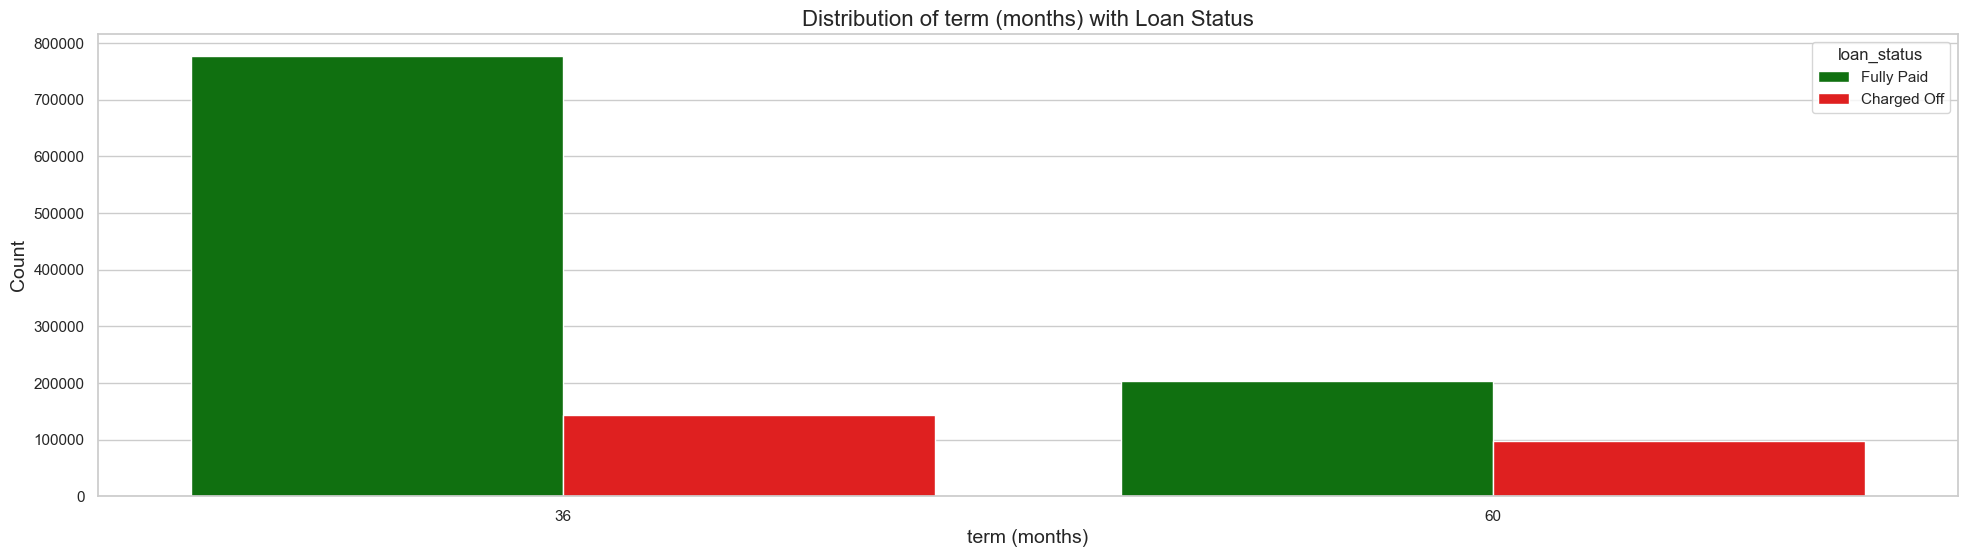

In [114]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 
term_order = sorted(df['term (months)'].unique())
sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='term (months)', data=df, order=term_order, hue='loan_status', palette=color_palette)

plt.xlabel('term (months)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of term (months) with Loan Status', fontsize=16)

plt.show()

In [115]:
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("term (months)").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("term (months)").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'term (months)': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,term (months),Percentage Charged Off
0,36,15.59
1,60,32.41


In [116]:
df.groupby('loan_status')['int_rate'].describe()



,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,15.80,4.93,5.31,12.39,15.10,18.75,30.99
Fully Paid,979419.00,12.65,4.55,5.31,9.17,12.29,15.31,30.99


### 16. sub_grade

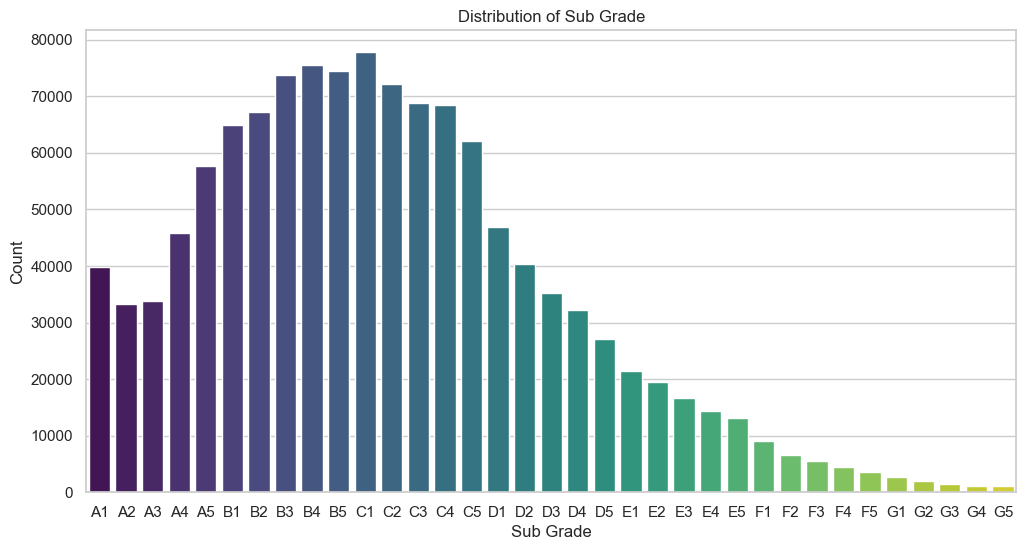

In [117]:
# Distibution of sub_grade

subgrade_order = sorted(df['sub_grade'].unique())

color_palette = sns.color_palette("viridis", len(subgrade_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette=color_palette)

plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Distribution of Sub Grade')


plt.show()




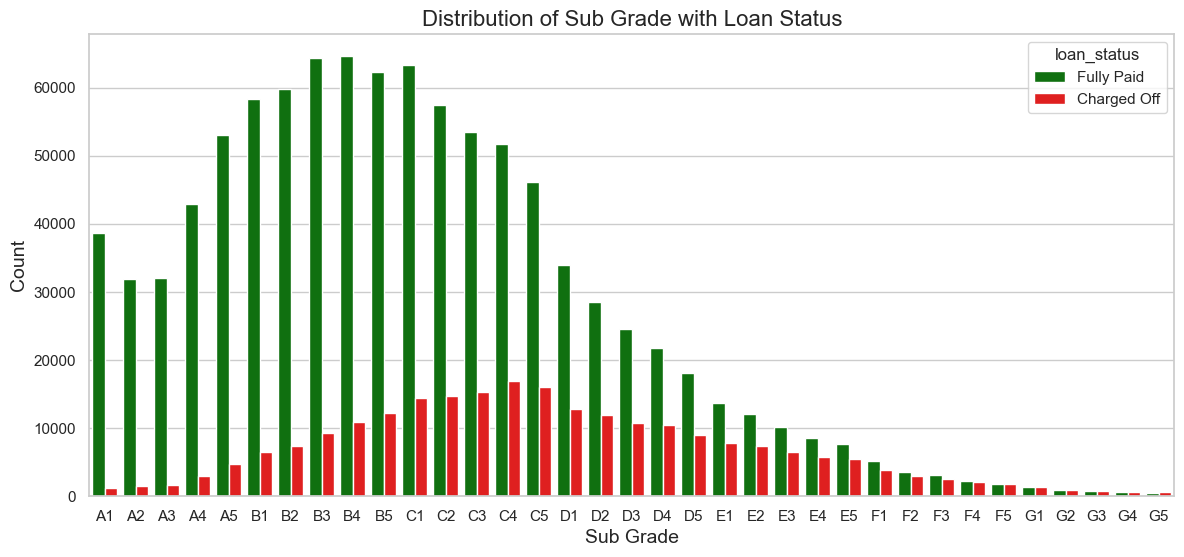

In [118]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='sub_grade', data=df, order=subgrade_order, hue='loan_status', palette=color_palette)

plt.xlabel('Sub Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Sub Grade with Loan Status', fontsize=16)

plt.show()



It appears that loans associated with F and G subgrades have a lower rate of repayment. Let's focus on these subgrades and create a countplot specifically for them to gain further insight.

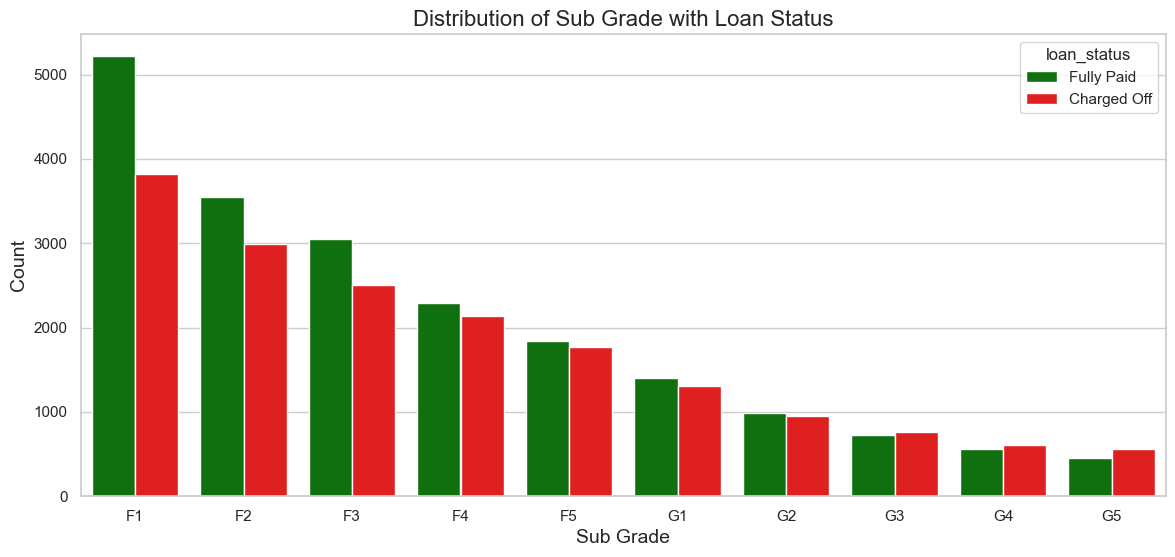

In [119]:
subgrade_order_f_g = sorted(df[df['sub_grade'].str.startswith(('F', 'G'))]['sub_grade'].unique())
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='sub_grade', data=df, order=subgrade_order_f_g, hue='loan_status', palette=color_palette)

plt.xlabel('Sub Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Sub Grade with Loan Status', fontsize=16)

plt.show()



Here we can clearly see that as subgrade progresses chance of getting paid back is lower. There is a pattern so we reatin this categorical variable

### 17. emp_length

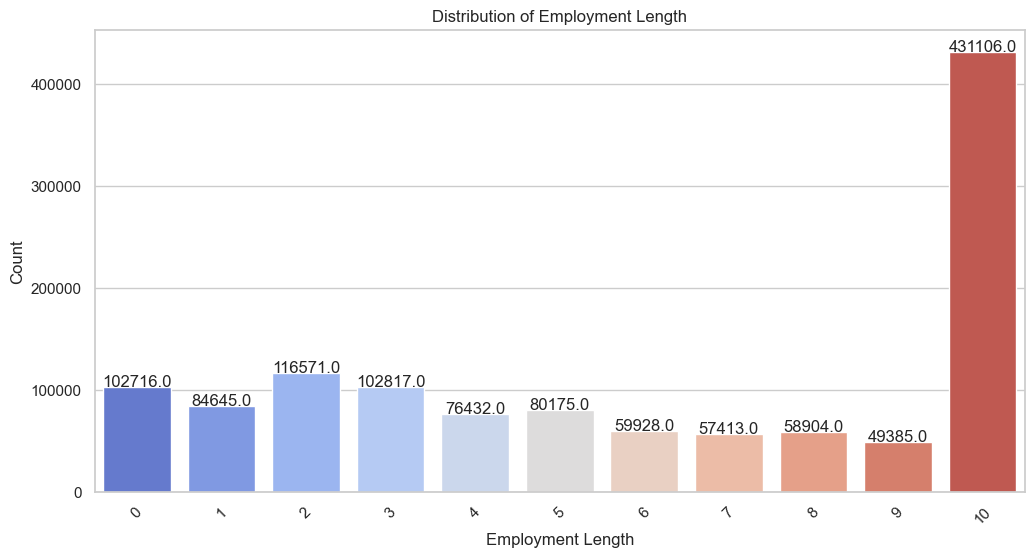

In [120]:
# Distibution of emp_length

emp_length_order = [i for i in range(0, 11)]

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='emp_length', data=df, order=emp_length_order, palette=color_palette)

plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')

# Rotating the x-axis labels 
plt.xticks(rotation=45)

# We need to annotate the bars with their counts
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center')

plt.show()



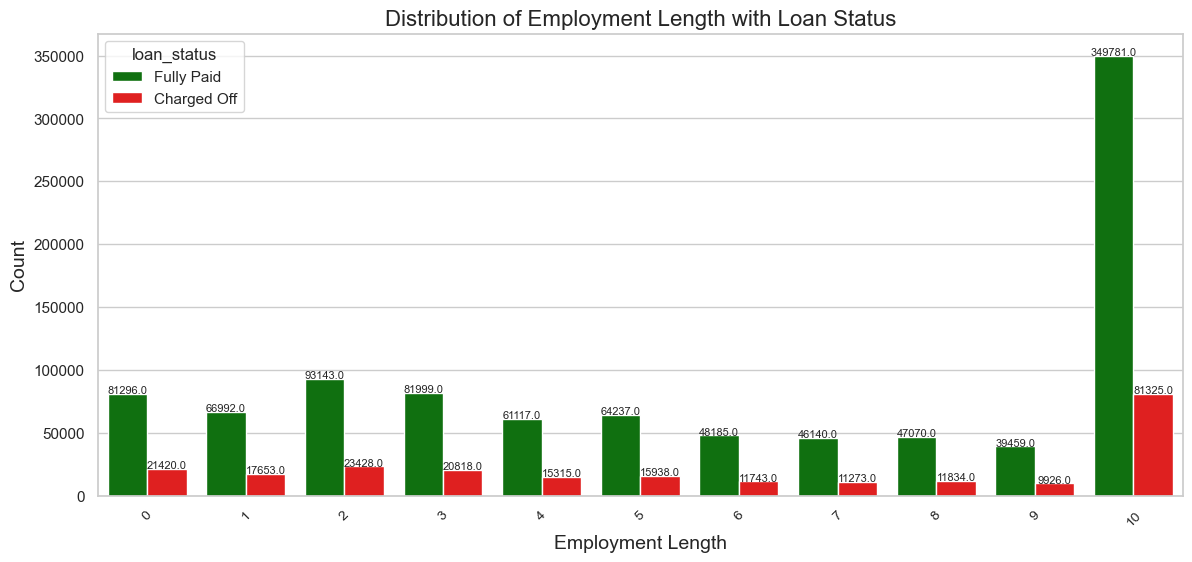

In [121]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status', palette=color_palette)

plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Employment Length with Loan Status', fontsize=16)

plt.xticks(rotation=45, fontsize=10)  

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center', fontsize=8)

plt.show()


This does not show any pattern across different cateegories i.e the length of employment. So to get a better understanding lets see how % of people caharged of based on emp_length

In [122]:
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("emp_length").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("emp_length").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'Employment Length': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,Employment Length,Percentage Charged Off
0,0.00,20.85
1,1.00,20.86
2,2.00,20.10
3,3.00,20.25
4,4.00,20.04
5,5.00,19.88
6,6.00,19.60
7,7.00,19.63
8,8.00,20.09
9,9.00,20.10


Again from this we can see that there is no particular pattern which affects the loan status. Therefore we drop this off

In [123]:
df = df.drop('emp_length', axis=1)


### 18. home_ownership

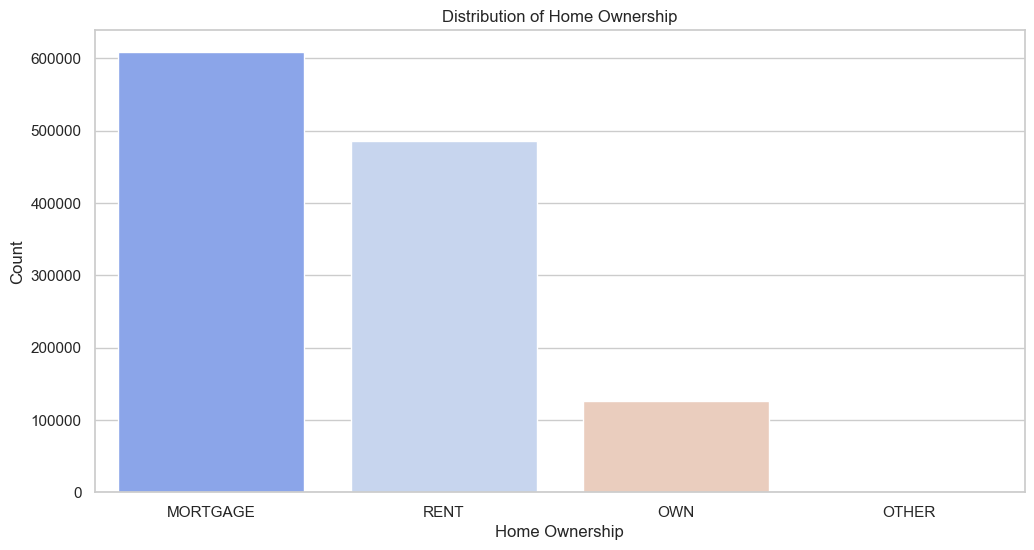

In [124]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df['home_ownership'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='home_ownership', data=df, palette=color_palette)

plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')


plt.show()



In [125]:
df['home_ownership'].value_counts()



home_ownership
MORTGAGE    608597
RENT        485441
OWN         125703
OTHER          351
Name: count, dtype: int64

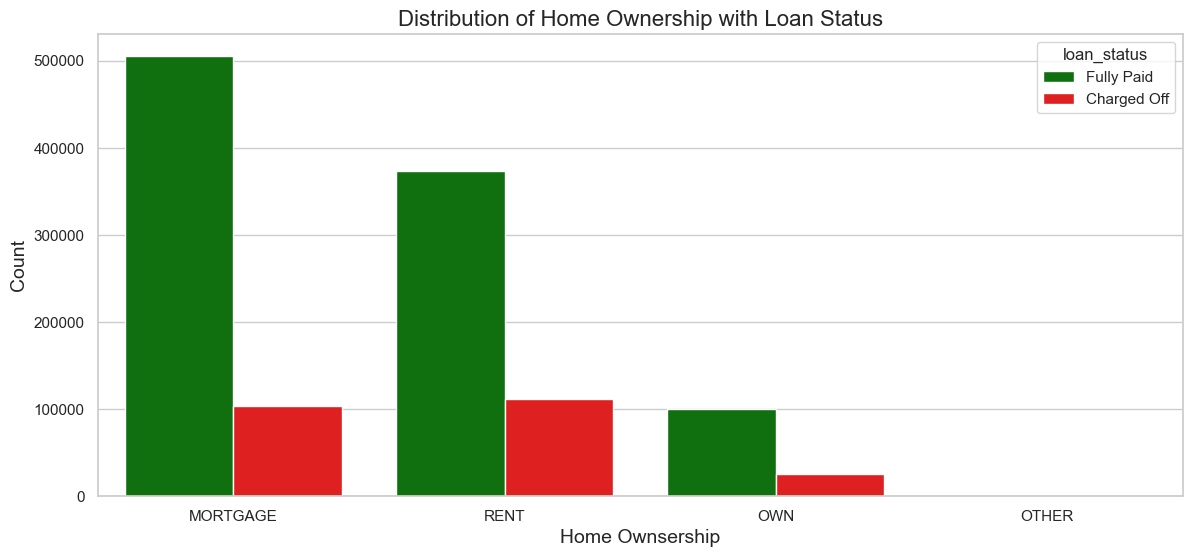

In [126]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='home_ownership', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('Home Ownsership', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Home Ownership with Loan Status', fontsize=16)

plt.show()



In [127]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("home_ownership").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("home_ownership").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'Hoem Ownership': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,Hoem Ownership,Percentage Charged Off
0,MORTGAGE,17.00
1,OTHER,18.80
2,OWN,20.03
3,RENT,23.07


We can clearly see that the chances of charge off is distinctive for each category and moreover charge off is less likely for applicants with own homes. Therefore we reatin thsi categorical variable and also as ther are only 4 categopries we perform ohe

### 19. verification_status

In [128]:
#verification_status

df['verification_status'].value_counts()



verification_status
Source Verified    493492
Not Verified       370977
Verified           355623
Name: count, dtype: int64

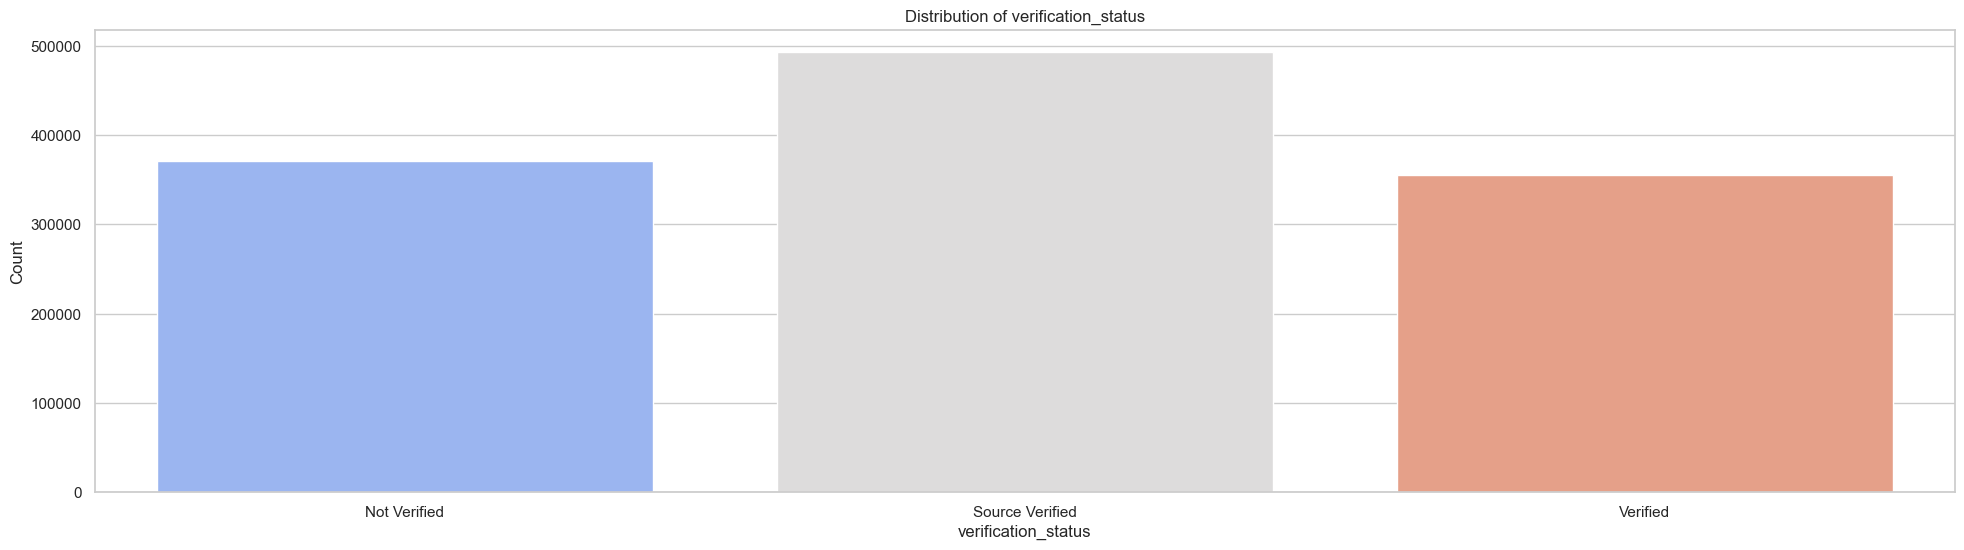

In [129]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df['verification_status'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='verification_status', data=df, palette=color_palette)

plt.xlabel('verification_status')
plt.ylabel('Count')
plt.title('Distribution of verification_status')

plt.show()



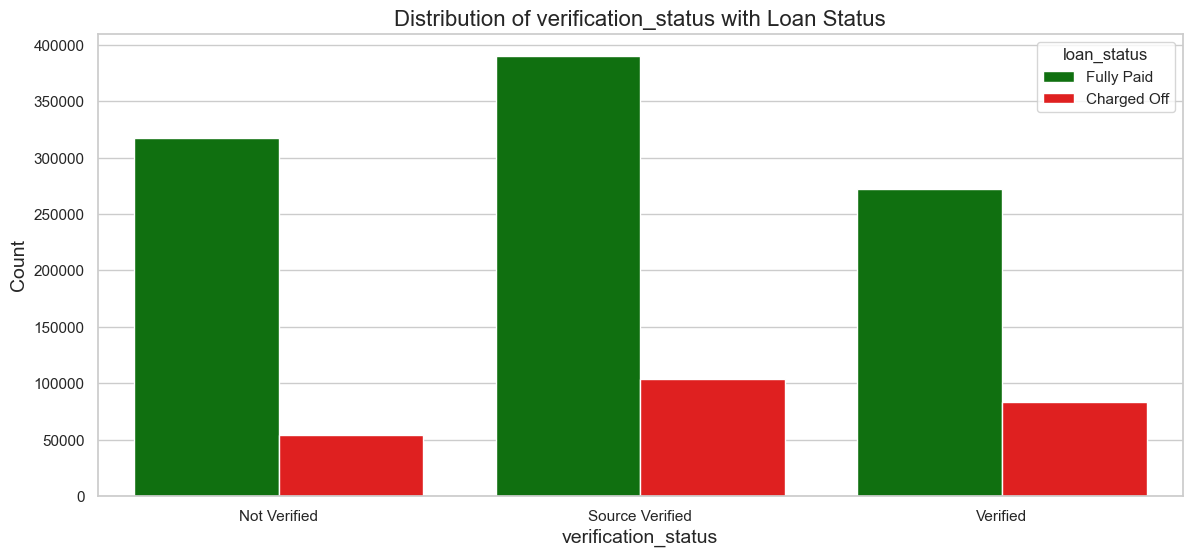

In [130]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='verification_status', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('verification_status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of verification_status with Loan Status', fontsize=16)

plt.show()



In [131]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("verification_status").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("verification_status").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'verification_status': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,verification_status,Percentage Charged Off
0,Not Verified,14.46
1,Source Verified,20.96
2,Verified,23.51


### 20. purpose

In [132]:
len(df['purpose'].unique())



14

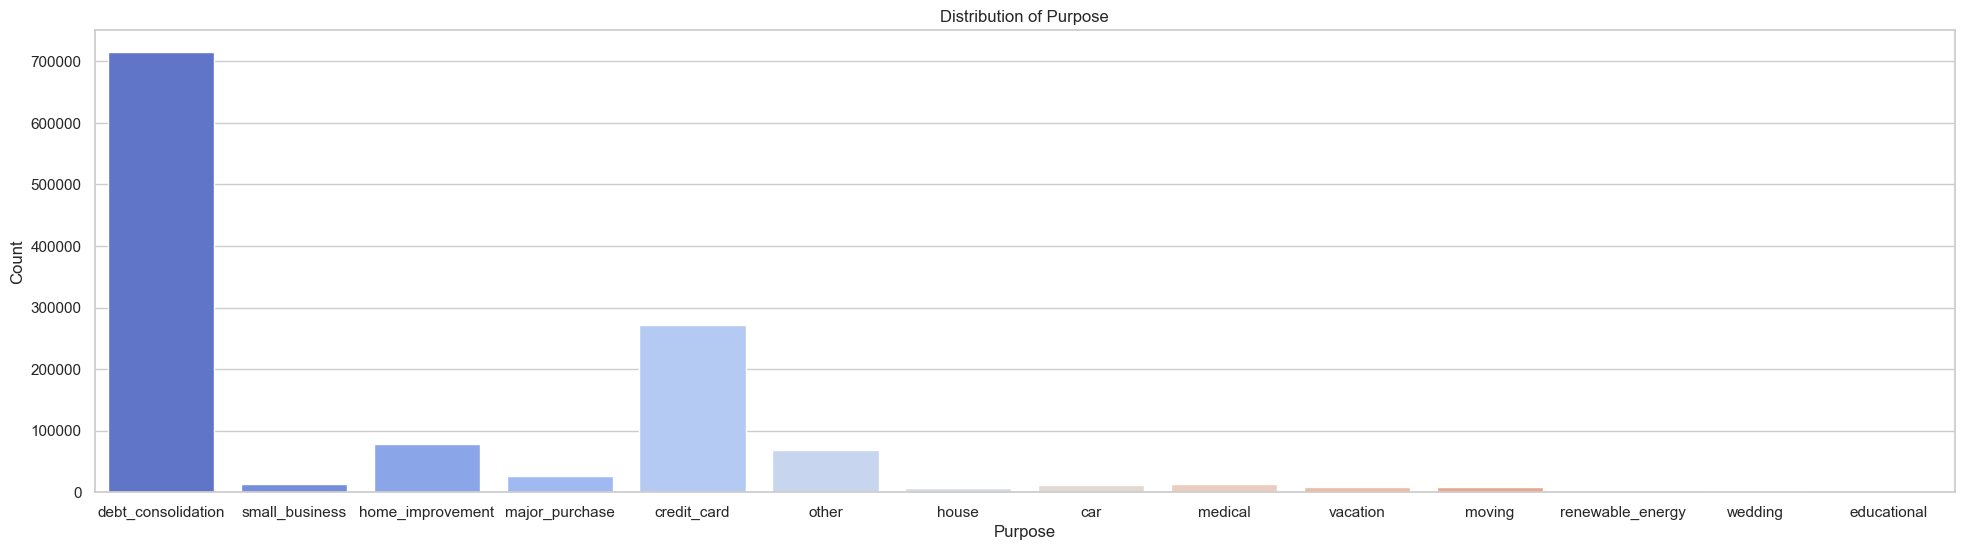

In [133]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df['purpose'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='purpose', data=df, palette=color_palette)

plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Distribution of Purpose')

plt.show()



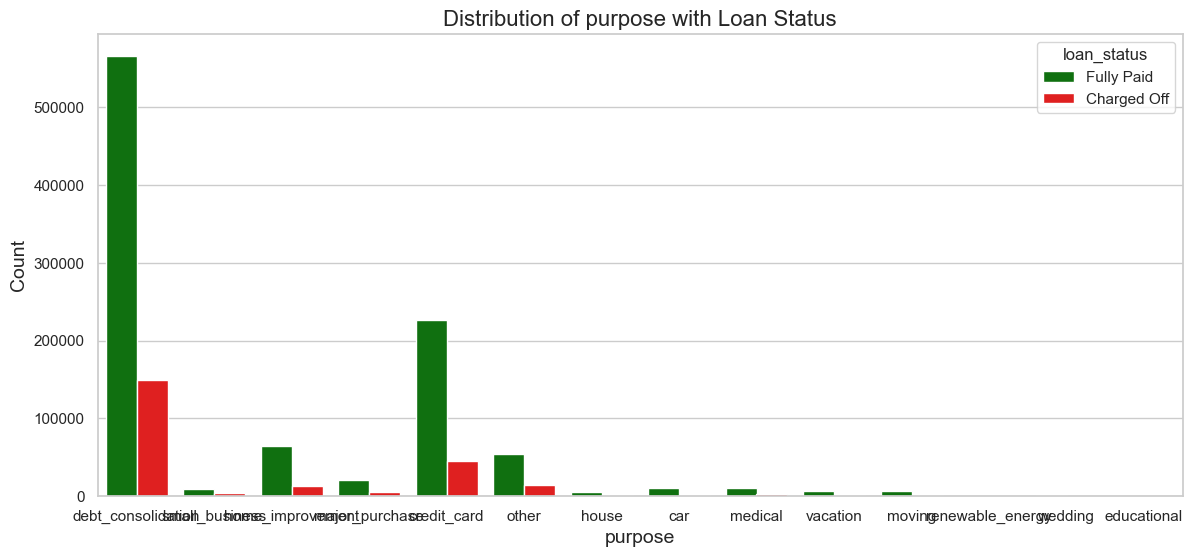

In [134]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='purpose', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of purpose with Loan Status', fontsize=16)

plt.show()



In [135]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("purpose").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("purpose").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'purpose': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,purpose,Percentage Charged Off
0,car,14.71
1,credit_card,16.57
2,debt_consolidation,20.90
3,educational,NaN
4,home_improvement,17.49
5,house,22.04
6,major_purchase,19.01
7,medical,21.15
8,moving,23.31
9,other,20.91


### 21. initial_list_status

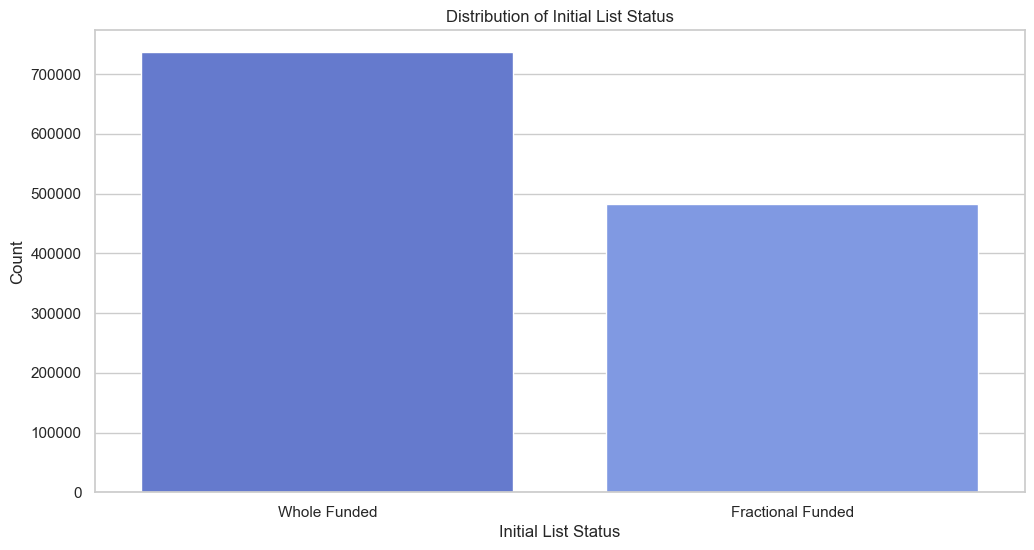

In [136]:
# Distibution of initial_list_status

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='initial_list_status', data=df, palette=color_palette)

plt.xlabel('Initial List Status')
plt.ylabel('Count')
plt.title('Distribution of Initial List Status')

plt.show()

In [137]:
df['initial_list_status'].value_counts()



initial_list_status
Whole Funded         736697
Fractional Funded    483395
Name: count, dtype: int64

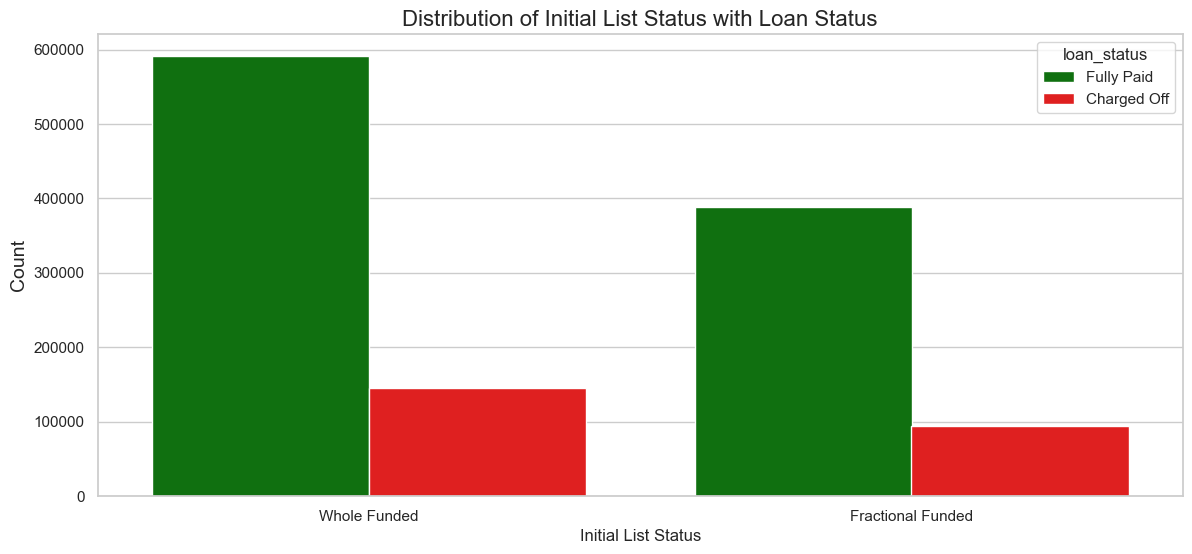

In [138]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='initial_list_status', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('Initial List Status')
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Initial List Status with Loan Status', fontsize=16)

plt.show()


In [139]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("initial_list_status").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("initial_list_status").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'Initial_list_Status': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,Initial_list_Status,Percentage Charged Off
0,Fractional Funded,19.66
1,Whole Funded,19.77


percentage charged off based on init_list_status is almost similar so this may not aid us in identifying charge off or defaults. therfore we drop this column

In [140]:
df = df.drop('initial_list_status', axis=1)



### 22. application_type

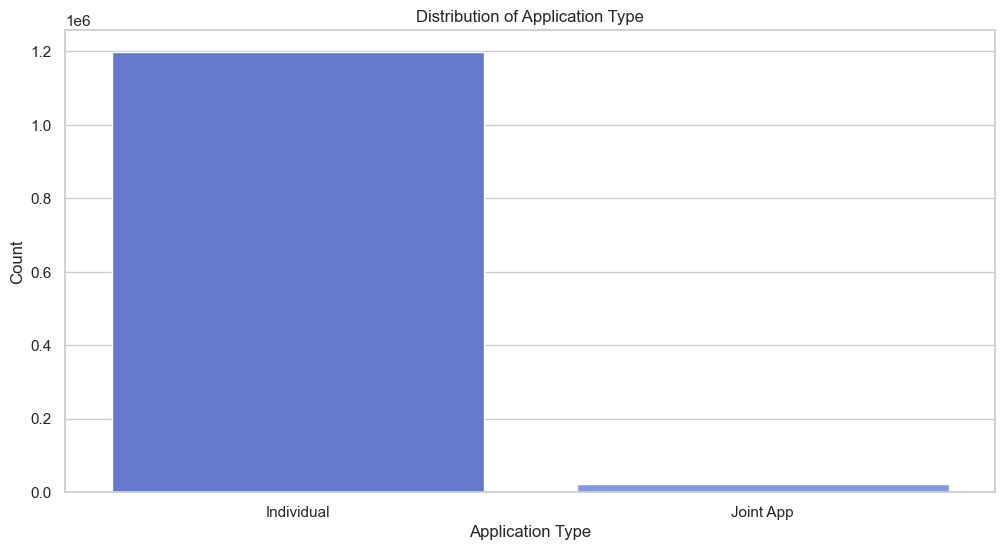

In [141]:
# Distibution of application_type

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='application_type', data=df, palette=color_palette)

plt.xlabel('Application Type')
plt.ylabel('Count')
plt.title('Distribution of Application Type')

plt.show()


In [142]:
df['application_type'].value_counts()



application_type
Individual    1198091
Joint App       22001
Name: count, dtype: int64

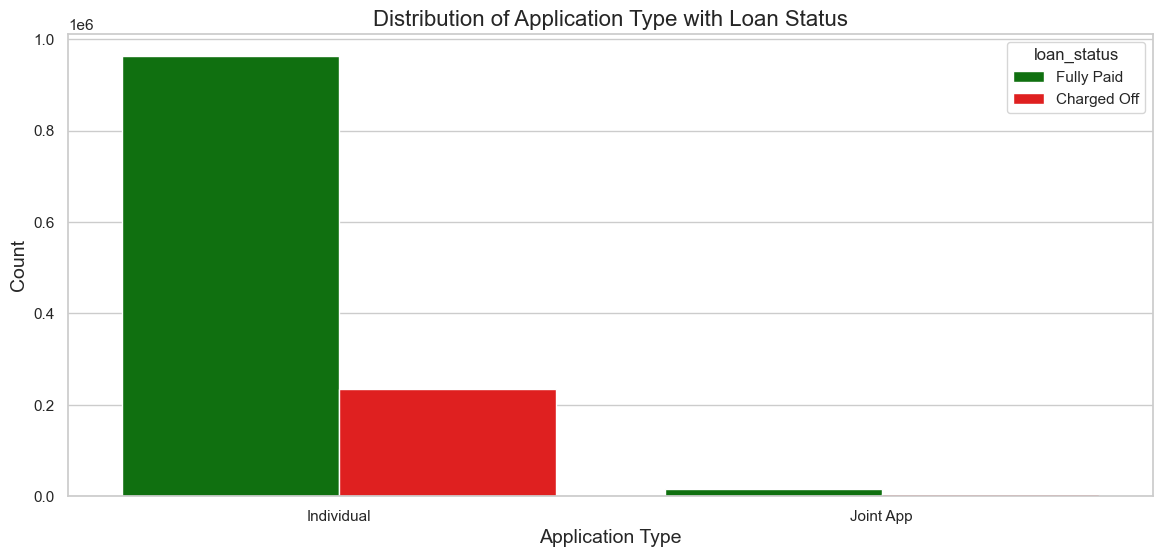

In [143]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='application_type', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('Application Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Application Type with Loan Status', fontsize=16)

plt.show()


In [144]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("application_type").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("application_type").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'Application Type': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,Application Type,Percentage Charged Off
0,Individual,19.66
1,Joint App,23.22


We can clearly see there is a ditiction in loan status based on application_type. So we plan to retain the categorical variable

### 23. earliest_cr_line

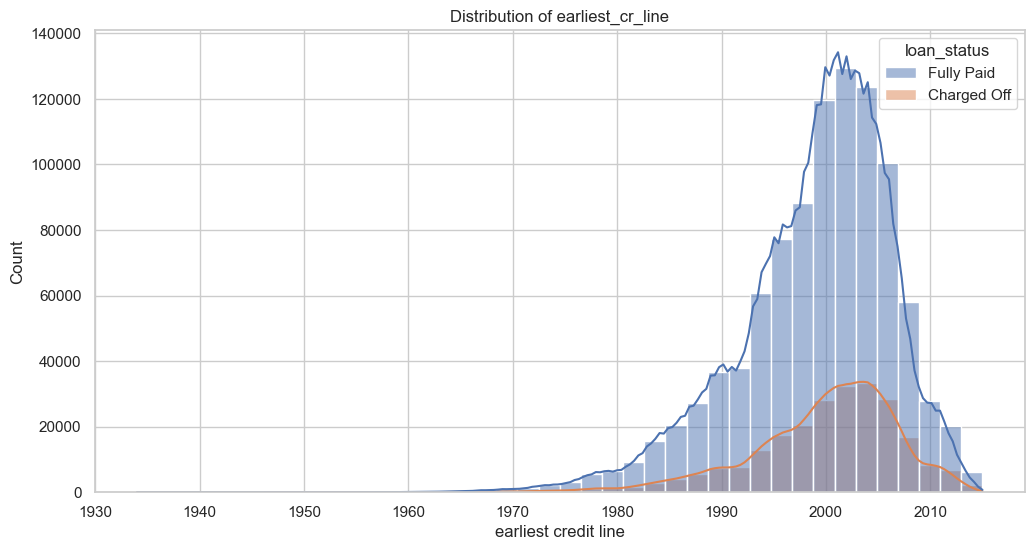

In [145]:
# Distibution of sub_grade
color_palette = sns.color_palette("viridis", len(subgrade_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(x='earliest_cr_line', data=df, hue='loan_status', bins=40, kde=True)

plt.xlabel('earliest credit line')
plt.ylabel('Count')
plt.title('Distribution of earliest_cr_line')


plt.show()





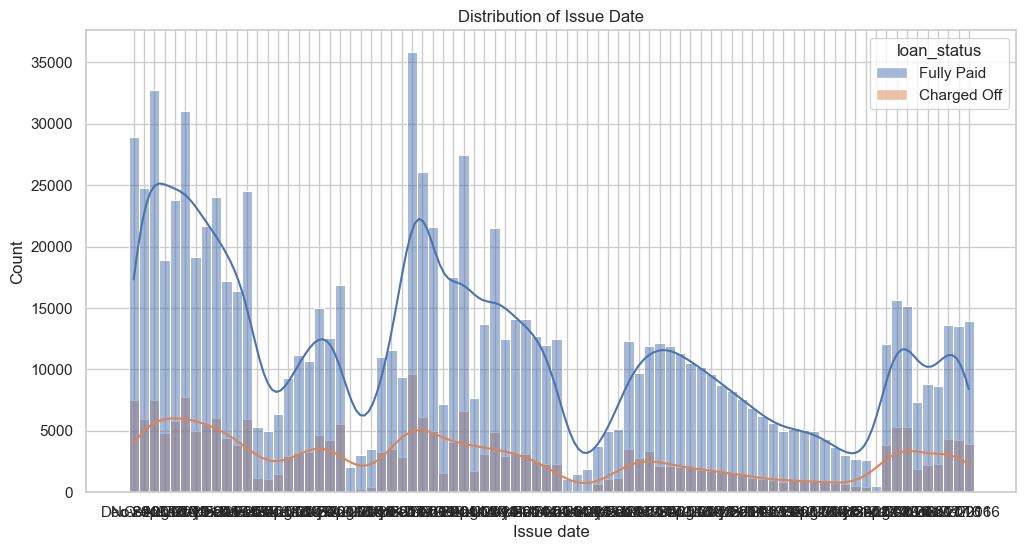

In [146]:
# Distibution of sub_grade
color_palette = sns.color_palette("viridis", len(subgrade_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(x='issue_d', data=df, hue='loan_status', bins=40, kde=True)

plt.xlabel("Issue date")
plt.ylabel('Count')
plt.title('Distribution of Issue Date')


plt.show()




In [148]:
df.groupby('loan_status')['earliest_cr_line'].describe()



,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.00,1999.80,7.19,1944.00,1996.00,2001.00,2005.00,2015.00
Fully Paid,979419.00,1998.87,7.35,1934.00,1995.00,2000.00,2004.00,2015.00


Mean earliest_cr_line for customers who fully paid the loan was approx. 1 year before the customers who did not pay the loan

In [149]:
df.groupby('loan_status')['issue_d'].describe()



,count,unique,top,freq
loan_status,,,,
Charged Off,240673,82,Mar-2016,9588
Fully Paid,979419,82,Mar-2016,35822


In [150]:

df = df.drop('earliest_cr_line' , axis=1)



### Train/Test Split

In [151]:
df['issue_d'].isnull().any()



False

In [152]:
df['issue_d'] = pd.to_datetime(df['issue_d'])



/var/folders/hm/0kk4xs8j0gz31ghsffmq2v6m0000gn/T/ipykernel_99355/3535102417.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


In [153]:
df['issue_d'].sample(5)



437311    2016-05-01
1044027   2012-11-01
372141    2018-01-01
734034    2014-07-01
1151164   2017-11-01
Name: issue_d, dtype: datetime64[ns]

In [154]:
df['issue_d'].describe()



count                          1220092
mean     2015-07-29 07:38:52.399851520
min                2012-03-01 00:00:00
25%                2014-08-01 00:00:00
50%                2015-09-01 00:00:00
75%                2016-07-01 00:00:00
max                2018-12-01 00:00:00
Name: issue_d, dtype: object

In [155]:
unique_issue_dates = df['issue_d'].unique()
sorted_unique_issue_dates = pd.Series(unique_issue_dates).sort_values()
print(sorted_unique_issue_dates)




72   2012-03-01
71   2012-04-01
70   2012-05-01
69   2012-06-01
68   2012-07-01
        ...    
22   2018-08-01
21   2018-09-01
44   2018-10-01
43   2018-11-01
42   2018-12-01
Length: 82, dtype: datetime64[ns]


Text(0.5, 1.0, 'Loans Funded per Year')

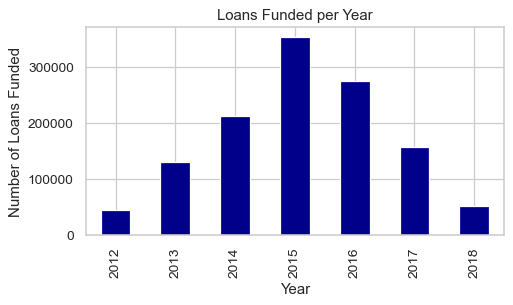

In [156]:
plt.figure(figsize=(6,3), dpi=90)
df['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')




We'll form the test set from the most recent 10% of the loans.

In [157]:
df_train = df.loc[df['issue_d'] <  df['issue_d'].quantile(0.9)]
df_test =  df.loc[df['issue_d'] >= df['issue_d'].quantile(0.9)]



In [147]:
# df_train = df_train.drop('issue_d' , axis=1)
# df_test = df_test.drop('issue_d' , axis=1)

In [158]:
print('Number of loans in the partition:   ', df_train.shape[0] + df_test.shape[0])
print('Number of loans in the full dataset:', df.shape[0])




Number of loans in the partition:    1220092
Number of loans in the full dataset: 1220092


In [159]:
df_train.shape, df_test.shape



((1096951, 23), (123141, 23))

In [160]:
df_train.head()



,loan_amnt,term (months),int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,fico_avg,pub_rec_category,mort_acc_category
0,3600.00,36,13.99,123.03,C4,MORTGAGE,55000.00,Not Verified,2015-12-01,Fully Paid,debt_consolidation,PA,5.91,7,0,2765.00,29.70,13,Individual,1.00,677.00,0,2
1,24700.00,36,11.99,820.28,C1,MORTGAGE,65000.00,Not Verified,2015-12-01,Fully Paid,small_business,SD,16.06,22,0,21470.00,19.20,38,Individual,4.00,717.00,0,5 or more
2,20000.00,60,10.78,432.66,B4,MORTGAGE,63000.00,Not Verified,2015-12-01,Fully Paid,home_improvement,IL,10.78,6,0,7869.00,56.20,18,Joint App,5.00,697.00,0,5 or more
3,10400.00,60,22.45,289.91,F1,MORTGAGE,104433.00,Source Verified,2015-12-01,Fully Paid,major_purchase,PA,25.37,12,0,21929.00,64.50,35,Individual,6.00,697.00,0,5 or more
4,11950.00,36,13.44,405.18,C3,RENT,34000.00,Source Verified,2015-12-01,Fully Paid,debt_consolidation,GA,10.20,5,0,8822.00,68.40,6,Individual,0.00,692.00,0,1


### Save Data to Files:

In [161]:
df_train.to_csv('../data/train2.csv', index=False)
df_test.to_csv('../data/test2.csv', index=False)

